# Изучение закономерностей, определяющих успешность игр
_____
### Описание проекта

Необходимо выявить определяющие успешность игры закономерности, что позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

_____
### Цели исследования

Определить закономерности влияющие на успешность игры.
_____
### Задачи исследования

Для выполнения поставленной цели необходимо решить несколько задач:

* изучить, сколько игр выпускалось в разные годы;
* определить актуальный период исследования;
* проанализировать продажи игр по платформам, определить потенциально прибыльные и популярные платформы;
* изучить влияние отзывов критиков и пользователей на продажи по платформам;
* изучить распеределение игр по жанрам;
* определить популярные платформы, жанры в каждом регионе;
* установить уровень влияние рейтинга ESRB на продажи по регионам.
______
### В данном исследовании представлен датасет со следующей информацией.

* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.
______

### Данное исследование разделим на несколько частей.

#### Часть 1. Изучение общей информации
* [1.1 Импорт библиотек, получение общей информации о датафрейме](#section_1_1)
* [1.2 Определение проблем в данных, объяснение причин их появления](#section_1_2)

#### Часть 2. Подготовка данных
* [2.1 Обработка пропусков и приведение данных к нужным типам](#section_2_1)
* [2.2 Определение и исправление аномалий и ошибок в данных](#section_2_2)
* [2.3 Составление информации о суммарных продажах во всех регионах и исправление аномалий](#section_2_3)

#### Часть 3. Исследовательский анализ данных
* [3.1 Изучить, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?](#section_3_1)
* [3.2 Как менялись продажи по платформам. За какой характерный срок появляются новые и исчезают старые платформы?](#section_3_2)
* [3.3 Какие платформы лидируют по продажам, растут или падают? Какие платформы являются потенциально прибыльными](#section_3_3)
* [3.4 График «ящик с усами» по глобальным продажам игр в разбивке по платформам](#section_3_4)
* [3.5 Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков?](#section_3_5)
* [3.6 Продажи игр на других платформах](#section_3_6)
* [3.7 Общее распределение игр по жанрам](#section_3_7)

#### Часть 4. Составление портрета пользователя каждого региона
* [4.1 Самые популярные платформы (топ-5) для пользователя каждого региона (NA, EU, JP)](#section_4_1)
* [4.2 Самые популярные жанры (топ-5)](#section_4_2)
* [4.3 Влияет ли рейтинг ESRB на продажи в отдельном регионе?](#section_4_3)

#### Часть 5. Проверка гипотез
* [5.1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые](#section_5_1)
* [5.2 Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные](#section_5_2)

#### Часть 6. Результаты исследования
* [Результаты исследования](#section_6_1)

## Часть 1. Изучение общей информации

<a id='section_1_1'></a>
### 1.1 Импорт библиотек, получение общей информации о датафрейме

Импортируем все библиотеки, которые будем использовать в процессе выполнения проекта

In [1]:
import pandas as pd
from textwrap import dedent
from IPython import get_ipython
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import stats as st
import warnings
warnings.filterwarnings('ignore')

In [2]:
try:
    data = pd.read_csv('games.csv')
except:
    data = pd.read_csv('/datasets/games.csv')
    
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Для упрощения работы и избежания потенциальных ошибок с верхним регистром приведем названия стобцов 

In [3]:
data.columns = data.columns.str.lower()
data.columns # проверим правильность выполнения

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Изучим общую информацию датафрейма

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


__Вывод:__
* при загрузке столбцы имели в названии верхний регистр (проблема решена);
* наблюдаются пропуски в нескольких столбцах (изучим их в следующем подпункте);
* некорректный тип данных для обозначения года релиза игры, оценки критиков, оценки пользователей (это также рассмотрим более подробно в следующем подпункте).

<a id='section_1_2'></a>
### 1.2 Определение проблем в данных, объяснение причин их появления

Создадим функцию, принимающую столбец и описывающую его данные, а также количество пропущенных в нем значений.

In [5]:
def investigate_column(column):
    print('Null or Na count is', column.isna().sum())
    print(column.describe())

__Столбец name__

In [6]:
investigate_column(data['name'])

Null or Na count is 2
count                           16713
unique                          11559
top       Need for Speed: Most Wanted
freq                               12
Name: name, dtype: object


Были обнаружены два пропущенных значения, изучим их.

In [7]:
data[data['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


_Описание проблем:_

* были обнаружены два пустых значения;
* Эти значения не имеют названия, жанра, оценки критиков, пользователей и рейтинг ESRB.

_Решение проблем:_
* Заполнение пропусков в данных строках не представляется возможным. Также таких строк всего две, что говорит о том, что их удаление не должно значительно исказить данные.

__Столбец platform__

In [8]:
investigate_column(data['platform'])

Null or Na count is 0
count     16715
unique       31
top         PS2
freq       2161
Name: platform, dtype: object


Пропущенных значений не обнаружено. Количество уникальных значений – 31, поэтому мы можем проверить их на дубликаты с учетом регистра.

In [9]:
data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

Дубликатов с учетом регистра не было обнаружено.

_Описание проблем:_

* проблем не обнаружено.

__Столбец year_of_release__

In [10]:
investigate_column(data['year_of_release'])

Null or Na count is 269
count    16446.000000
mean      2006.484616
std          5.877050
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64


Было обнаружено 269 пропущенных значений года релиза игры. Также данные имеют некорректный тип данный – вещественный.

In [11]:
data[data['year_of_release'].isnull()].head(15)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
678,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
719,Call of Duty 3,Wii,NaN,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T


_Описание проблем:_

* Было обнаружено 269 пустых значений. Возможно пустые значения появились из-за технических ошибок при выгрузке данных;
* Некорректный тип данных.

_Решение проблем:_
* Мы имеем названия игр и платформы, а следовательно, зная эту информацию, можно заполнить пропуски из тех строк, где указан год релиза для конкретной игры и конкретной платформы;
* Для года мы можем использовать тип данных Int64.

__Столбец genre__

In [12]:
investigate_column(data['genre'])

Null or Na count is 2
count      16713
unique        12
top       Action
freq        3369
Name: genre, dtype: object


Были обнаружены 2 пустых значения. Количество уникальных значений – 12, поэтому мы можем проверить их на дубликаты с учетом регистра.

In [13]:
data['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

_Описание проблем:_
* 2 пропущенных значения по жанру игры, которые были также замечены при описании проблем в столбце `name`;
* верхний регистр в названиях жанра.

_Решение проблем:_
* проблема пустых значений решится при предобработке столбца `name`
* приведем значения столбца в нижний регистр для упрощения работы с данными.

__Столбец na_sales__

In [14]:
investigate_column(data['na_sales'])

Null or Na count is 0
count    16715.000000
mean         0.263377
std          0.813604
min          0.000000
25%          0.000000
50%          0.080000
75%          0.240000
max         41.360000
Name: na_sales, dtype: float64


_Описание проблем:_
* третий квартиль значительно ниже максимального значения, возможно наличие аномальных значений. 
Предположительно в датафрейме учитываются все игры: непопулярных игр в датафрейме значительно больше популярных, которых, судя по данным, незначительное количество.

_Решение проблем:_
* необходимо провести исследовательский анализ данных на предмет ошибок и аномальных значений.

__Столбец eu_sales__

In [15]:
investigate_column(data['eu_sales'])

Null or Na count is 0
count    16715.000000
mean         0.145060
std          0.503339
min          0.000000
25%          0.000000
50%          0.020000
75%          0.110000
max         28.960000
Name: eu_sales, dtype: float64


_Описание проблем:_
* та же проблема, что и с данными по продажам в Северной Америке.

_Решение проблем:_
* необходимо провести исследовательский анализ данных на предмет ошибок и аномальных значений.

__Столбец jp_sales__

In [16]:
investigate_column(data['jp_sales'])

Null or Na count is 0
count    16715.000000
mean         0.077617
std          0.308853
min          0.000000
25%          0.000000
50%          0.000000
75%          0.040000
max         10.220000
Name: jp_sales, dtype: float64


_Описание проблем:_
* та же проблема, что и с данными по продажам в Северной Америке и Европе.

_Решение проблем:_
* необходимо провести исследовательский анализ данных на предмет ошибок и аномальных значений.

__Столбец other_sales__

In [17]:
investigate_column(data['other_sales'])

Null or Na count is 0
count    16715.000000
mean         0.047342
std          0.186731
min          0.000000
25%          0.000000
50%          0.010000
75%          0.030000
max         10.570000
Name: other_sales, dtype: float64


_Описание проблем:_
* та же проблема, что и с данными по продажам в Северной Америке, Европе и Японии.

_Решение проблем:_
* необходимо провести исследовательский анализ данных на предмет ошибок и аномальных значений.

__Столбец critic_score__

In [18]:
investigate_column(data['critic_score'])

Null or Na count is 8578
count    8137.000000
mean       68.967679
std        13.938165
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64


_Описание проблем:_
* некорректный тип данных – вещественный;
* 8578 пропущенных значений.

Некорректный тип данных мог быть вызван техническими ошибками при выгрузке данных разработчиком. 
Пустые значения могли быть вызваны человеческим фактором, то есть могли остаться незаполненными.

_Решение проблем:_
* изменить тип данных на целочисленный;
* заменим пустые значения по оценке критиков по конкретной игре конкретной платформы оценками критиков по игре из другой платформы там, где это возможно;
* остальные пустые значения оставим.

__Столбец user_score__

In [19]:
investigate_column(data['user_score'])

Null or Na count is 6701
count     10014
unique       96
top         tbd
freq       2424
Name: user_score, dtype: object


In [20]:
data[data['user_score']=='tbd'].count()

name               2424
platform           2424
year_of_release    2376
genre              2424
na_sales           2424
eu_sales           2424
jp_sales           2424
other_sales        2424
critic_score       1082
user_score         2424
rating             2374
dtype: int64

_Описание проблем:_
* некорректный тип данных – строковый;
* 'tbd' в числовых данных
* 6701 пропущенных значений.


Некорректный тип данных мог быть вызван наличием в столбце 'tbd' (to be decided - будет определено). 
Пустые значения могли быть вызваны человеческим фактором, то есть могли остаться незаполненными.


Изучем срез данных с оценкой пользователей 'tbd'.

In [21]:
data[data['user_score']=='tbd'].tail(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16568,Luxor: Pharaoh's Challenge,DS,2007.0,Puzzle,0.00,0.01,0.00,0.0,NaN,tbd,E
16574,Smart Boy's Winter Wonderland,DS,2008.0,Misc,0.01,0.00,0.00,0.0,NaN,tbd,E
16577,Space Raiders,GC,2003.0,Shooter,0.01,0.00,0.00,0.0,40.0,tbd,T
16593,Winx Club: Saving Alfea,3DS,2014.0,Action,0.00,0.01,0.00,0.0,NaN,tbd,E
16599,Legends of Oz: Dorothy's Return,3DS,2014.0,Puzzle,0.00,0.01,0.00,0.0,NaN,tbd,E
16615,Balloon Pop 2,3DS,2012.0,Puzzle,0.01,0.00,0.00,0.0,NaN,tbd,E
16626,The Ultimate Battle of the Sexes,Wii,2010.0,Misc,0.01,0.00,0.00,0.0,NaN,tbd,T
16633,SBK Superbike World Championship,PSP,2008.0,Racing,0.01,0.00,0.00,0.0,NaN,tbd,E10+
16638,Tour de France 2014,PS3,2014.0,Sports,0.00,0.01,0.00,0.0,NaN,tbd,E
16647,Metal Gear Solid HD Edition,X360,2011.0,Action,0.00,0.00,0.01,0.0,NaN,tbd,M


В результате изучения среза не было обнаружено закономерностей появления 'tbd' в значениях оценок пользователей.

_Решение проблем:_
* изменить тип данных на вещественный;
* заменим 'tbd' на пустые значения;
* заменим пустые значения по оценке критиков по конкретной игре конкретной платформы оценками критиков по игре из другой платформы там, где это возможно;
* оставшиеся пустые значения оставим.

__Столбец rating__

In [22]:
investigate_column(data['rating'])

Null or Na count is 6766
count     9949
unique       8
top          E
freq      3990
Name: rating, dtype: object


_Описание проблем:_

Было обнаружено 6766 пустых значений. Вполнне вероятно они не были заполнены при составлении базы данных. Количество уникальных значений – 8, поэтому мы можем проверить их на дубликаты с учетом регистра.

In [23]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

_Решение проблем:_
* пропуски рейтинга ESRB можно заменить по данным одной игры на другой платформе.

Почему так много пустых значений? Стоит учесть, что рейтинги стали присваиваться с 1994 года. Также вполне вероятно, что эти рейтинги не были присвоены тем играм, которые не продавались в США, Канаде и Мексике, где рейтинг ESRB действует. Есть вероятность ошибок при заполнении данных.

__Вывод:__
* в рамках работ по первой части была изучена общая информация по датафрейму; 
* дана характеристика данных каждого из столбцов;
* выявлены проблемы в данных, такие как неверный тип или пропуски;
* определены причины появления проблем;
* разработаны способы решения проблем в данных.

## Часть 2. Подготовка данных

<a id='section_2_1'></a>
### 2.1 Обработка пропусков и приведение данных к нужным типам

В первой части мы определили три столбца, в которых нужно заменить тип данных: `year_of_release`, `critic_score` и `user_score`. Также мы определили тип, на который нужно поменять данные.

Также в некоторых столбцах были обнаружены пропуски различного происхождения.

Произведем замену типов данных и обработаем пропуски в соответствии с инструкциями из первой части.

__Стобцы name и genre__

В данных столбцах были обнаружены 2 пустых значения, симметричных друг дургу. Произведем их удаление.

In [24]:
data.dropna(subset=['name'], inplace=True)

Произведем проверку двух столбцов на пропущенные значения.

In [25]:
investigate_column(data['name'])

Null or Na count is 0
count                           16713
unique                          11559
top       Need for Speed: Most Wanted
freq                               12
Name: name, dtype: object


In [26]:
investigate_column(data['genre'])

Null or Na count is 0
count      16713
unique        12
top       Action
freq        3369
Name: genre, dtype: object


__Стобец year_of_release__

В столбце были обнаружены 269 пустых значений. Возможно, что некоторые из них были пропущены при вводе информации в базу данных. Эту ошибку можем решить, вставив вместо пустого значения года релиза по определенной игре на других платформах, где год релиза есть. Для этого создадим словарь, где ключом является название игры, а значением – год релиза.

In [27]:
game_year_of_release = data.groupby(['name'])['year_of_release'].median().to_dict()

def year_of_release(row):
    if pd.isna(row['year_of_release']):
        return game_year_of_release.get(row['name'])
    return row['year_of_release']
 
data['year_of_release'] = data.apply(year_of_release, axis=1)
investigate_column(data['year_of_release'])


Null or Na count is 146
count    16567.000000
mean      2006.490403
std          5.862637
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64


In [28]:
data['year_of_release'] = data['year_of_release'].fillna(0)
data['year_of_release'] = data['year_of_release'].astype('int')
data['year_of_release'] = data['year_of_release'].replace(0, np.nan)
data['year_of_release'] = data['year_of_release'].astype('Int64')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16567 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(5), object(5)
memory usage: 1.5+ MB


Оставшиеся пропуски не будем обрабатывать и удалять, чтобы не повлиять на результаты анализа.

__Столбец critic_score__

В данном столбце 8578 пропусков, тип данных – вещественный. Заполним пустые значения и поменяем тип на целочисленный.

In [29]:
game_critic_score = data.groupby('name')['critic_score'].median().to_dict()

def critic_score(row):
    if pd.isna(row['critic_score']):
        return game_critic_score.get(row['name'])
    return row['critic_score']
 
data['critic_score'] = data.apply(critic_score, axis=1)
investigate_column(data['critic_score'])

Null or Na count is 7615
count    9098.000000
mean       68.784843
std        14.124159
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64


В результате 963 пропущенных значений были заполнены.

In [30]:
data['critic_score'] = data['critic_score'].fillna(0)
data['critic_score'] = data['critic_score'].astype('int')
data['critic_score'] = data['critic_score'].replace(0, np.nan)
data['critic_score'] = data['critic_score'].astype('Int64')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16567 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     9098 non-null   Int64  
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: Int64(2), float64(4), object(5)
memory usage: 1.6+ MB


Заполнять оставшиеся пропуски будет некорректно: метод заполения средним или медианой по столбцу может сильно повлиять на выводы исследования.

__Столбец user_score__

Заменим tbd на -1, чтобы провести изменение типа данных на вещественный, а затем произвести заполнение пропусков по словарю.
После заполнения пропусков в пользовательских оценках заменим -1 на пустое значение.

In [31]:
data['user_score'] = data['user_score'].replace('tbd', '-1')
data['user_score'] = data['user_score'].astype('float64')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16567 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     9098 non-null   Int64  
 9   user_score       10014 non-null  float64
 10  rating           9949 non-null   object 
dtypes: Int64(2), float64(5), object(4)
memory usage: 1.6+ MB


In [32]:
game_user_score = data.groupby(['name'])['user_score'].median().to_dict()

def user_score(row):
    if pd.isna(row['user_score']):
        return game_user_score.get(row['name'])
    return row['user_score']
 
data['user_score'] = data.apply(user_score, axis=1)
investigate_column(data['user_score'])

Null or Na count is 6270
count    10443.000000
mean         5.171766
std          3.712172
min         -1.000000
25%          2.500000
50%          6.900000
75%          8.000000
max          9.700000
Name: user_score, dtype: float64


В результате обработки были заполнены данными около 500 пустых значений

In [33]:
data['user_score'] = data['user_score'].replace(-1, np.nan)
investigate_column(data['user_score']) # проверим корректность выполненых действий

Null or Na count is 8779
count    7934.000000
mean        7.123488
std         1.510548
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: user_score, dtype: float64


__Столбец rating__

In [34]:
game_rating = data.set_index('name')['rating'].to_dict()
 
def rating_name(row):
    if pd.isna(row['rating']):
        return game_rating.get(row['name'])
    return row['rating']
 
data['rating'] = data.apply(rating_name, axis=1)
investigate_column(data['rating'])

Null or Na count is 6565
count     10148
unique        8
top           E
freq       4062
Name: rating, dtype: object


Пустых значений стало меньше 201 единицу. Так как сказано, что данные взяты из открытого источника, можно предположить, что эти данные были не до конца проработаны, но установить точно это невозможно, поэтому пустые значения заменим на 'unrated'.

In [35]:
data['rating'] = data['rating'].replace(np.nan, 'unrated')
investigate_column(data['rating']) # проверим корректность выполненых действий

Null or Na count is 0
count       16713
unique          9
top       unrated
freq         6565
Name: rating, dtype: object


<a id='section_2_2'></a>

### 2.2 Определение аномалий и ошибок в данных

Создадим функции для создания гистограмм частот и ящика с усами для конкретного столбца.

In [64]:
plt.rcParams['figure.dpi'] = 150

def plot_parametrs (df, column, x1, x2, n_bins, xlabel):
    df.plot (kind='hist', y=column, range=(x1,x2), label=column, title = "Гистограмма распределения " + str(column), bins=n_bins, grid=True, legend=True)
    plt.xlabel (xlabel)
    plt.ylabel ('Частота')

def boxplot_parametrs (df, column, y1, y2, ylabel):
    plt.ylim(y1,y2)
    df.boxplot(column)
    plt.title ('Диаграмма размаха '+ str(column))
    plt.ylabel (ylabel)

__Столбец na_sales__

In [65]:
investigate_column(data['na_sales'])

Null or Na count is 0
count    16713.000000
mean         0.263302
std          0.813565
min          0.000000
25%          0.000000
50%          0.080000
75%          0.240000
max         41.360000
Name: na_sales, dtype: float64


Так как максимальное значение в этом столбце равно 41.36, установим границы построения гистограмм от 0 до 50.

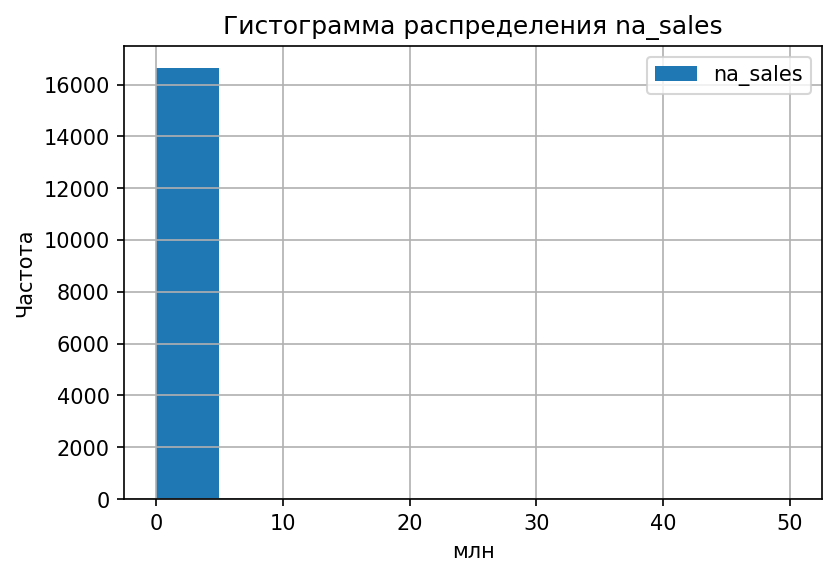

In [66]:
plot_parametrs (data, 'na_sales', 0, 50, 10, 'млн')

Гистограмма показывает что значительное большинство значений имеет продажи равные от 0 до 5 млн. Возьмем границы поменьше, от 0 до 1 млн.

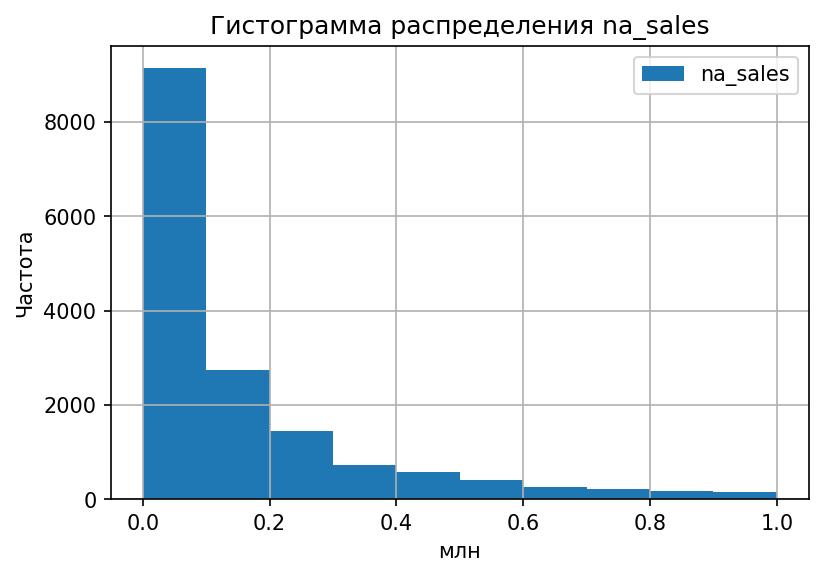

In [67]:
plot_parametrs (data,'na_sales', 0, 1, 10, 'млн')

__Комментарии:__

Наибольшее число игр (примерно 9 тыс.) имели продажи от 0 до 0.1 млн в Северной Америке. Значения от 0.6 млн уже редки.

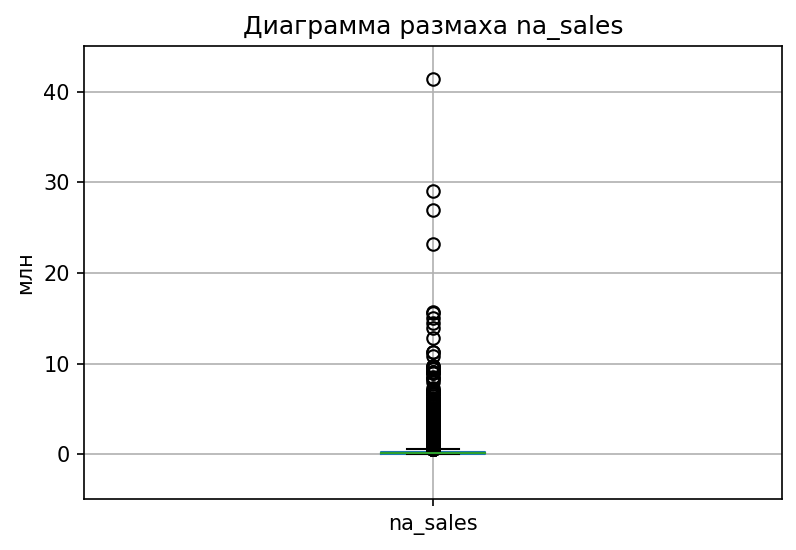

In [68]:
boxplot_parametrs (data, 'na_sales', -5, 45, 'млн')

__Комментарии:__

Диагрмма размаха с такими границами не дает возможности сделать вывод об аномалиях, хотя можно сказать, что они достигают значения более 40 млн.

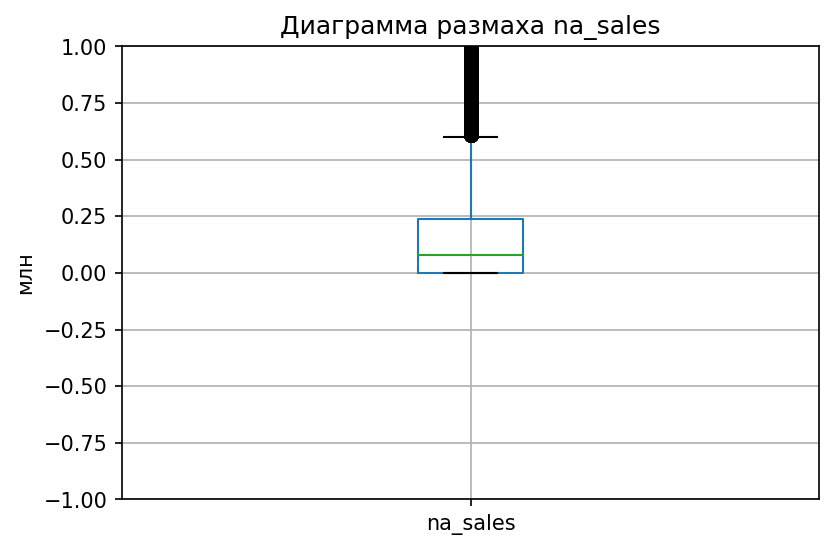

In [69]:
boxplot_parametrs (data, 'na_sales', -1, 1, 'млн')

__Комментарии:__

Диаграмма размаха показывает, что аномальные значения в продажах в Северной Америке начинаются примерно от 0.6 млн.

Для того, чтобы не повлиять на результаты исследования по другим регионам, удалять аномальные значения по данным одного региона не будем. Этому же будем придерживаться по данным по продажам в различных регионах. Обработаем аномалии после суммирования всех продаж.

__Столбец eu_sales__

In [42]:
investigate_column(data['eu_sales'])

Null or Na count is 0
count    16713.000000
mean         0.145045
std          0.503359
min          0.000000
25%          0.000000
50%          0.020000
75%          0.110000
max         28.960000
Name: eu_sales, dtype: float64


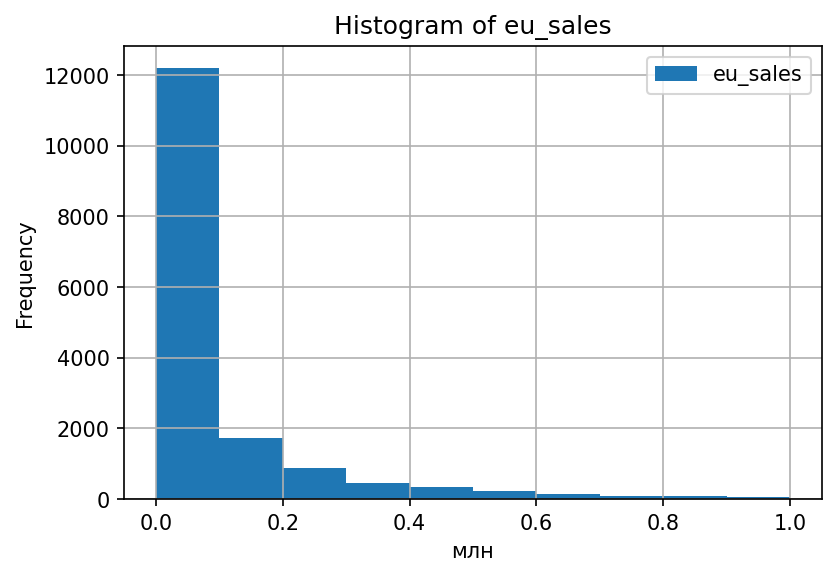

In [43]:
plot_parametrs (data, 'eu_sales', 0, 1, 10, 'млн')

__Комментарии:__

Наибольшее число игр (более 12 тыс.) имели продажи от 0 до 0.1 млн в Европе. Значения от 0.6 млн уже редки.

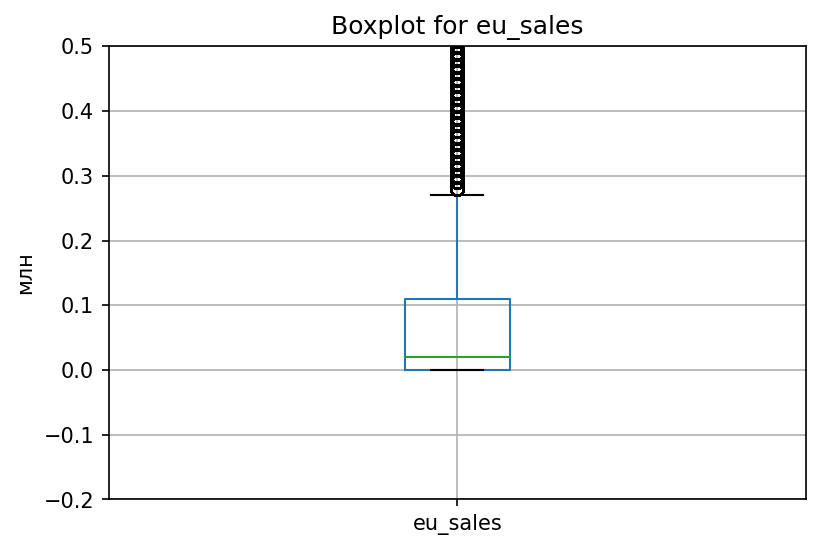

In [44]:
boxplot_parametrs (data, 'eu_sales', -0.2, 0.5, 'млн')

__Комментарии:__

Диаграмма размаха показывает, что аномальные значения в продажах в Европе начинаются примерно от 0.3 млн.

__Столбец jp_sales__

In [45]:
investigate_column(data['jp_sales'])

Null or Na count is 0
count    16713.000000
mean         0.077625
std          0.308871
min          0.000000
25%          0.000000
50%          0.000000
75%          0.040000
max         10.220000
Name: jp_sales, dtype: float64


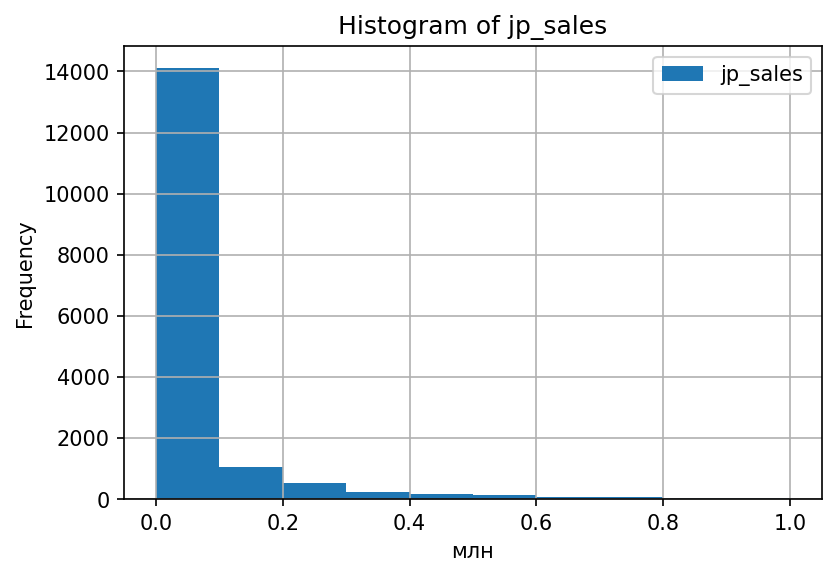

In [46]:
plot_parametrs (data, 'jp_sales', 0, 1, 10, 'млн')

__Комментарии:__

Наибольшее число игр (14 тыс.) имели продажи от 0 до 0.1 млн в Японии. Значения от 0.4 млн уже редки.

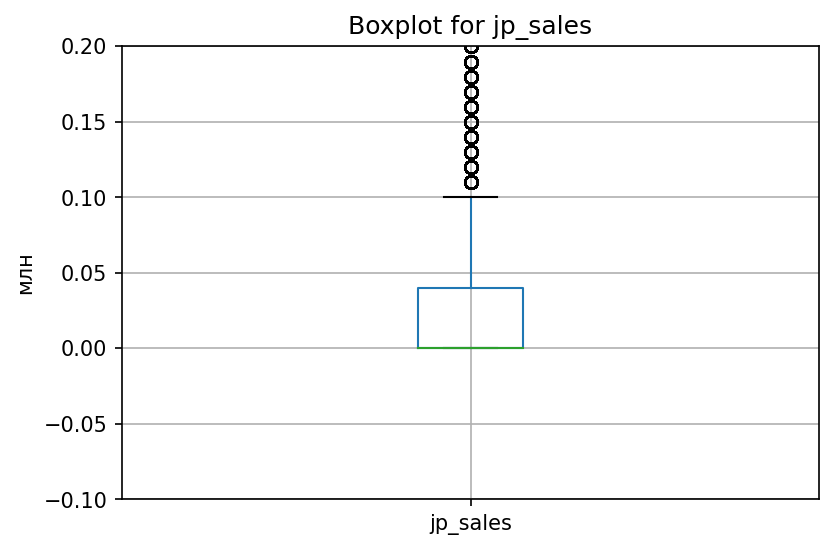

In [47]:
boxplot_parametrs (data, 'jp_sales', -0.1, 0.2, 'млн')

__Комментарии:__

Диаграмма размаха показывает, что аномальные значения в продажах в Японии начинаются примерно от 0.1 млн.

__Столбец other_sales__

In [48]:
investigate_column(data['other_sales'])

Null or Na count is 0
count    16713.000000
mean         0.047343
std          0.186742
min          0.000000
25%          0.000000
50%          0.010000
75%          0.030000
max         10.570000
Name: other_sales, dtype: float64


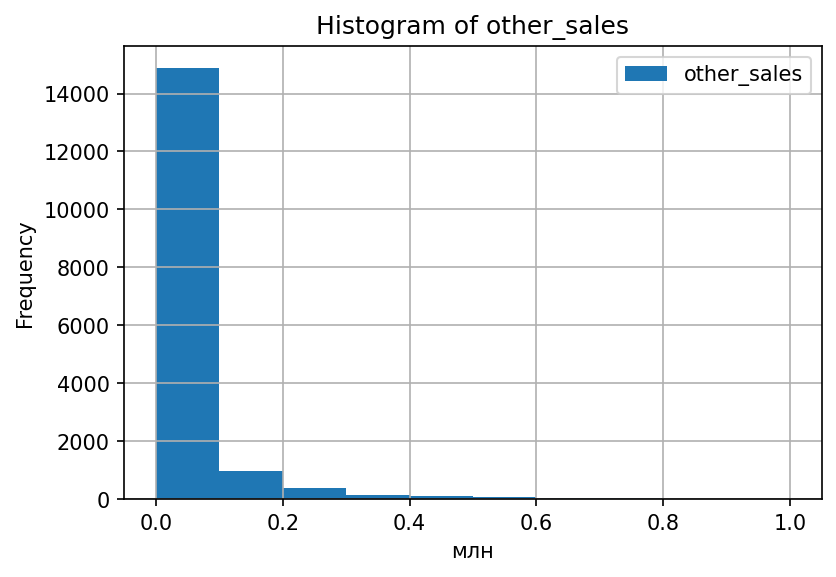

In [49]:
plot_parametrs (data, 'other_sales', 0, 1, 10, 'млн')

__Комментарии:__

Наибольшее число игр (более 14 тыс.) имели продажи от 0 до 0.1 млн в других регионах. Значения от 0.3 млн уже редки.

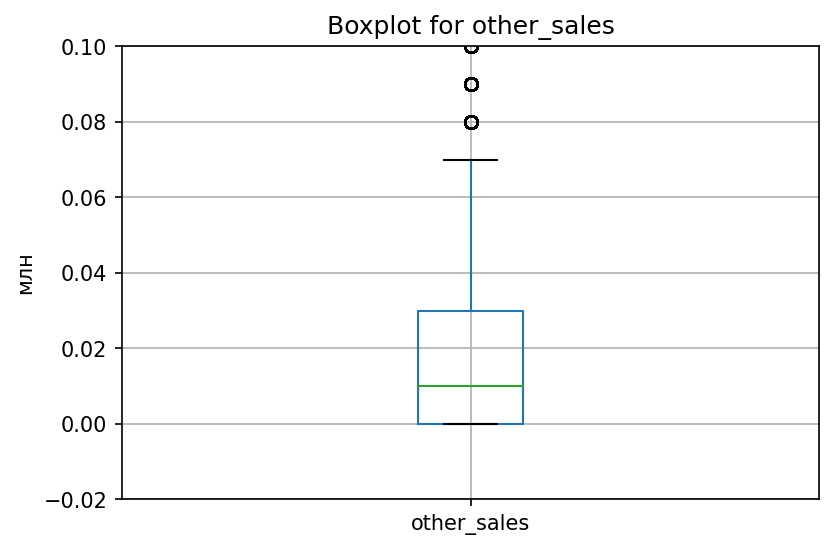

In [50]:
boxplot_parametrs (data, 'other_sales', -0.02, 0.1, 'млн')

__Комментарии:__

Диаграмма размаха показывает, что аномальные значения в продажах в других регионах начинаются примерно от 0.08 млн.

<a id='section_2_3'></a>
### 2.3 Составление информации о суммарных продажах во всех регионах и исправление аномалий

Для получения суммарных продаж по играм произведем сложение столбцов по всем регионам.

In [51]:
data['total_sales'] = data['na_sales']+data['eu_sales']+data['jp_sales']+data['other_sales']
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,unrated,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,unrated,31.38


In [52]:
investigate_column(data['total_sales'])

Null or Na count is 0
count    16713.000000
mean         0.533315
std          1.548282
min          0.000000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.540000
Name: total_sales, dtype: float64


Произведем анализ данных по суммарным продажам. Изучим гистограмму и диаграмму размаха для удаления аномальных значений.

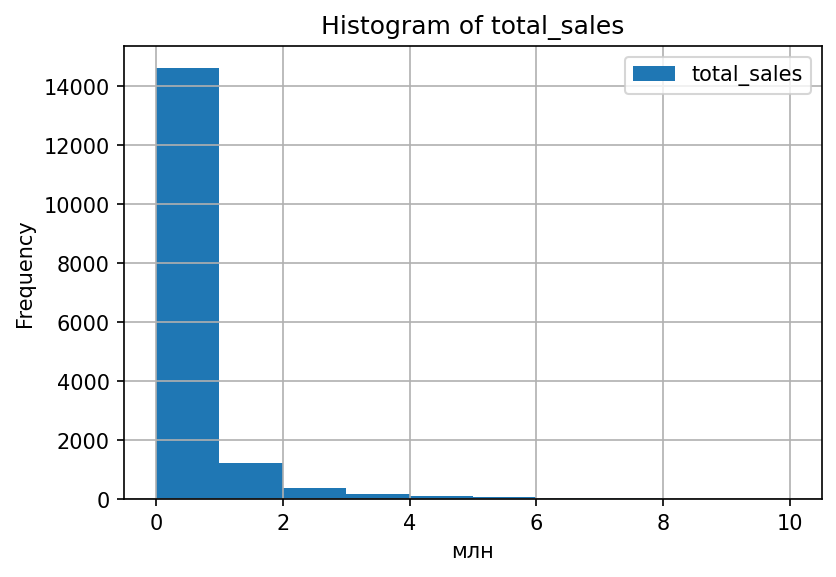

In [53]:
plot_parametrs (data, 'total_sales', 0, 10, 10, 'млн')

__Комментарии:__

Наибольшее число игр (более 14 тыс.) имели суммарные продажи от 0 до 1 млн. Значения от 3 млн уже редки.

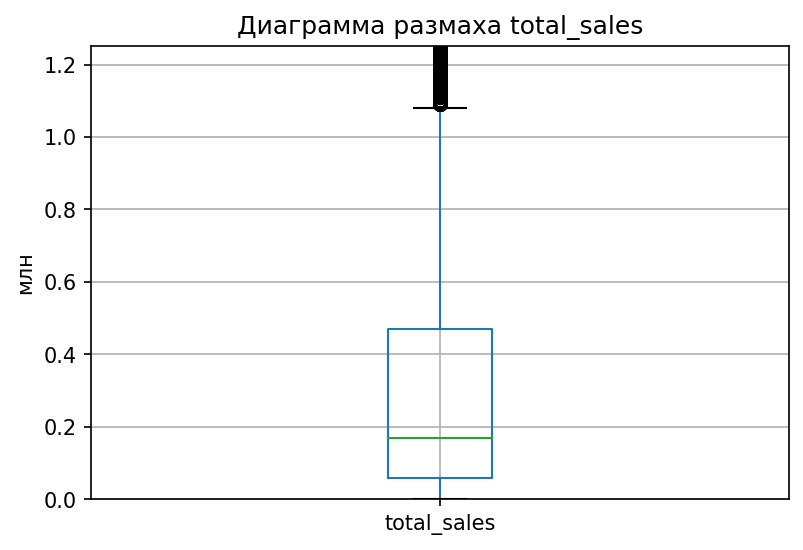

In [95]:
boxplot_parametrs (data, 'total_sales', 0, 1.25, 'млн')

__Комментарии:__

Диаграмма размаха показывает, что аномальные значения в суммарных продажах начинаются примерно от 1.1 млн.

В связи с этим посчитаем значения суммарных продаж от 3 млн аномальными. Сохраним обновленный датафрейм и продолжим работу с ним.

In [55]:
new_data = data.query('total_sales < 3')
new_data ['total_sales'].describe() # проверим данные

count    16237.000000
mean         0.357499
std          0.498258
min          0.000000
25%          0.060000
50%          0.160000
75%          0.430000
max          2.990000
Name: total_sales, dtype: float64

In [56]:
new_data.info() # проверим общую информацию

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16237 entries, 476 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16237 non-null  object 
 1   platform         16237 non-null  object 
 2   year_of_release  16092 non-null  Int64  
 3   genre            16237 non-null  object 
 4   na_sales         16237 non-null  float64
 5   eu_sales         16237 non-null  float64
 6   jp_sales         16237 non-null  float64
 7   other_sales      16237 non-null  float64
 8   critic_score     8754 non-null   Int64  
 9   user_score       7591 non-null   float64
 10  rating           16237 non-null  object 
 11  total_sales      16237 non-null  float64
dtypes: Int64(2), float64(6), object(4)
memory usage: 1.6+ MB


In [72]:
print ('Количество дубликатов в new_data:', new_data.duplicated().sum())

Количество дубликатов в new_data: 0


__Выводы:__
* пропущенные значения в столбцах были заменены по словарям для конкретных столбцов;
* замена пропущенных значений средним и медианой не была проведена, так как такой метод может исказить данные;
* наибольшее число игр по регионам имели продажи от 0 до 0.1 млн;
* наибольшее число игр имели суммарные продажи от 0 до 1 млн;
* значения суммарных продаж от 3 млн считаются аномальными;
* дубликатов не обнаружено.

### Часть 3. Исследовательский анализ данных

<a id='section_3_1'></a>
### 3.1 Изучить, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

Создадим график, показывающий число выпущенных игр в год.

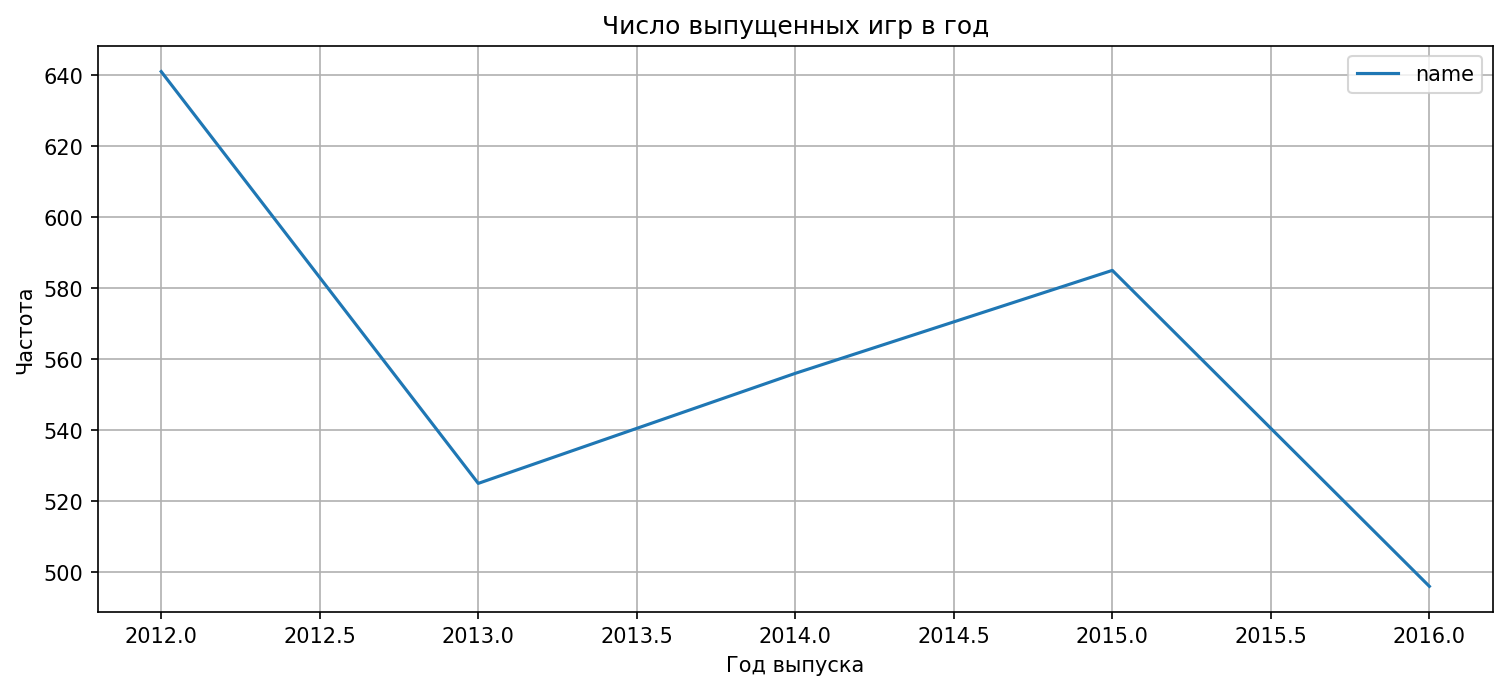

In [89]:
(new_data
     .pivot_table(index='year_of_release', values='name', aggfunc='count')
     .plot(grid=True, figsize=(12, 5))
)
plt.ylabel ('Частота')
plt.xlabel ('Год выпуска')
plt.title ('Число выпущенных игр в год')
plt.show();

___Важны ли данные за все периоды?___

Изучив частоту релиза игр за весь период наблюдений можно сделать вывод, что необходимым для исследования периодом является 2004-2016 гг., так как с 2004 по 2008 гг. наблюдался рост в связи с появлением новых платформ, а 2009-2013 гг. демонстрирует картину спада после упомянутого роста. С 2013 года наблюдаются колебания в численности выпущенных в год игр примерно от 500 до 650 млн в год.

Спад в 2009–2013 может быть обусловлен двумя причинами:
* сильный рост совпал с выходом новых платформ PS3, X360, DS. Можно предположить, что мировой финансовый кризис в 2008–2009 гг. повлиял на разработчиков видеоигр, то есть предприятия закрывались или поглощались по финансовым соображениям, что вызвало резкое снижение годового показателя выпущенных игр в 2009–2013 гг.;
* рост мобильных игр.

<a id='section_3_2'></a>
### 3.2 Как менялись продажи по платформам. За какой характерный срок появляются новые и исчезают старые платформы?

Выберем платформы с наибольшими суммарными продажами и построим распределение по годам.

In [73]:
popular_platforms = new_data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
popular_platforms

platform
PS2     891.77
PS3     619.68
X360    593.00
PS      509.20
DS      499.40
Wii     473.33
GBA     259.22
PSP     249.76
XB      239.81
PC      200.36
GC      167.23
PS4     160.47
N64     142.26
3DS     137.43
SNES    113.22
XOne    112.20
NES     104.34
2600     80.36
GB       76.40
PSV      54.07
WiiU     48.61
SAT      33.59
GEN      18.00
DC       15.95
SCD       1.86
NG        1.44
WS        1.42
TG16      0.16
3DO       0.10
GG        0.04
PCFX      0.03
Name: total_sales, dtype: float64

Посчитаем, что популярными платформами являются при суммарных продажах от 200 млн.

In [74]:
test = popular_platforms.loc[lambda x : x>200]
list_of_popular_platforms = test.keys()

In [75]:
test = new_data.query('platform in @list_of_popular_platforms')
test['platform'].unique()

array(['PC', 'PS2', 'PS3', 'GBA', 'X360', 'DS', 'Wii', 'PS', 'XB', 'PSP'],
      dtype=object)

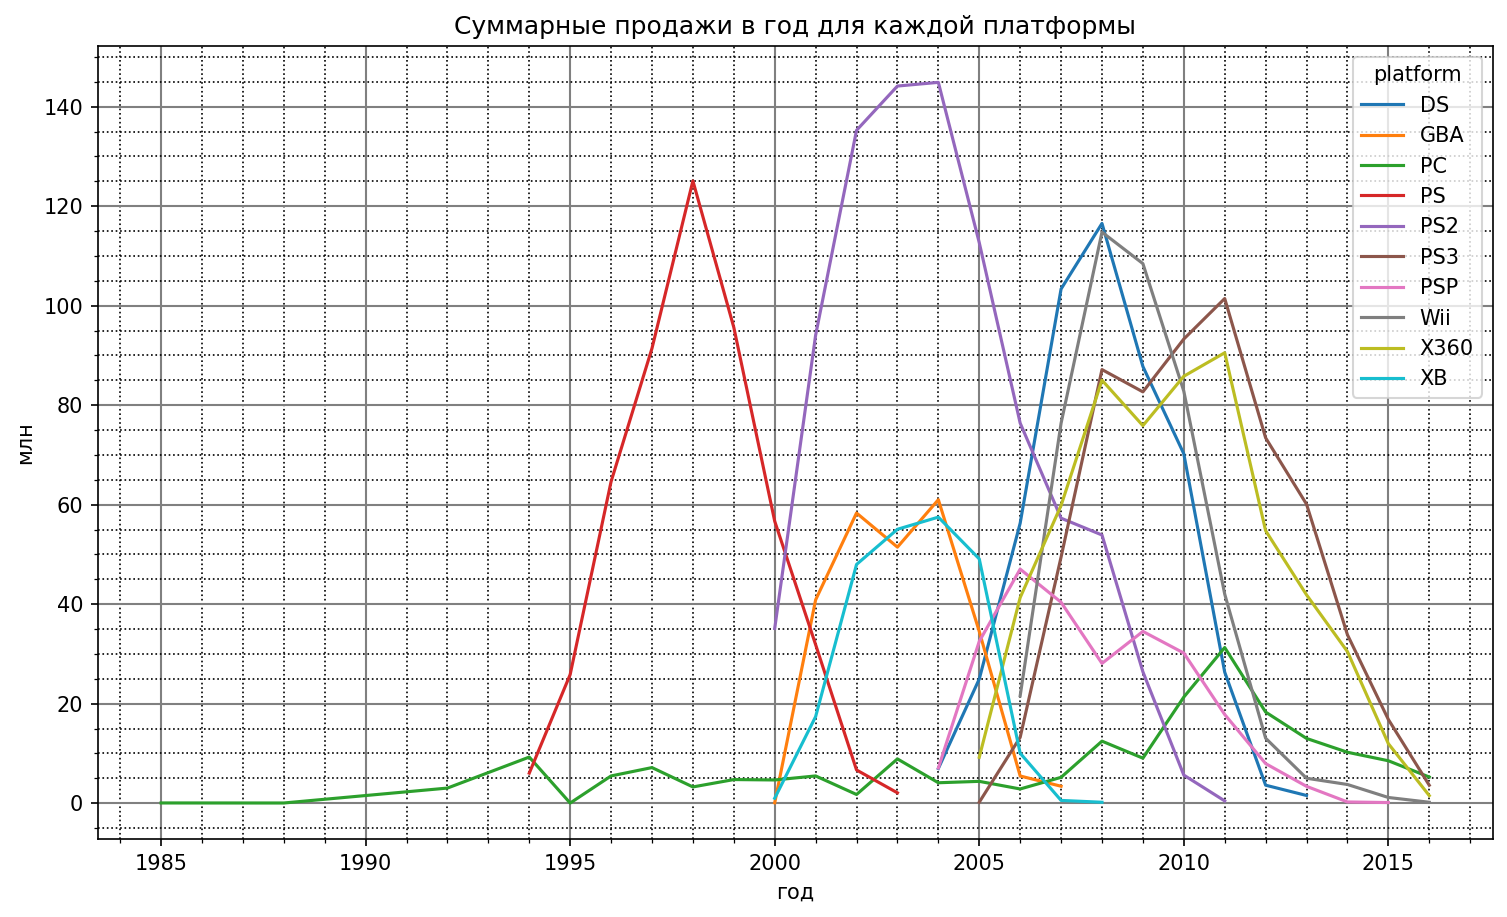

In [107]:
bar_pop = test.reset_index().pivot_table(index=['year_of_release'], columns = ['platform'], values='total_sales', aggfunc='sum')
bar_pop.plot(grid=True, figsize=(12,7))
plt.minorticks_on()
plt.grid(which='major',
        color = 'gray',
        linewidth = 1)
plt.grid(which='minor', 
        color = 'k', 
        linestyle = ':')
plt.ylabel ('млн')
plt.xlabel ('год')
plt.title ('Суммарные продажи в год для каждой платформы')
plt.show();

___За какой период появляются и исчезают платформы?___

* PC существует весь период наблюдения;
* PS наблюдался с 1994 по 2003 гг., то есть 9 лет;
* PS2 появился в 2000 г. и в 2011 г. продажи остановились, 11 лет;
* GBA также появился в 2000 г., но продажи остановились в 2007 г., 7 лет;
* Продажи игр на XB стартовали в 2000 г. и продолжались до 2008 г., 8 лет;
* PSP начал наблюдаться в 2004 г., продажи остановились в 2015 г., 11 лет;
* DS – с 2004 г. по 2013 г., 9 лет;
* X360 – с 2005 г. по 2016 г., 11 лет;
* PS3 – с 2005 г. по 2016 г., 11 лет;
* Wii – с 2006 г. по 2016 г., 10 лет.
* В среднем платформы существуют 9,7 лет.

__Выбор актуального периода__

В результате анализа суммарных продаж по всем платформам и по популярным, было определено, что актуальным периодом исследования является 2012–2016 гг., так как с 2012 года наблюдаются колебания в численности выпущенных в год игр примерно от 500 до 650 млн в год. 


In [83]:
new_data = new_data[new_data['year_of_release']>=2012].copy()
new_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
481,Middle-Earth: Shadow of Mordor,PS4,2014,Action,1.01,1.43,0.05,0.47,84,8.1,M,2.96
484,Titanfall,XOne,2014,Shooter,1.84,0.80,0.04,0.27,86,6.4,M,2.95
493,Call of Duty: Ghosts,XOne,2013,Shooter,1.88,0.77,0.00,0.27,78,4.3,M,2.92
494,FIFA 15,X360,2014,Sports,0.79,1.92,0.00,0.21,82,4.2,E,2.92
507,Madden NFL 13,X360,2012,Sports,2.53,0.15,0.00,0.17,81,5.8,E,2.85


<a id='section_3_3'></a>
### 3.3 Какие платформы лидируют по продажам, растут или падают? Какие платформы являются потенциально прибыльными.

Сгруппируем платформы по суммарным продажам игр, а также добавим информацию о годах начала и конца продаж игр для платформы, чтобы определить перспективы, исходя из среднего периода актуальности платформы. 

In [84]:
new_data.groupby("platform").agg(
                total_sales=pd.NamedAgg(column='total_sales', aggfunc='sum'),
                first_sale_year=pd.NamedAgg(column='year_of_release', aggfunc='min'),
                last_sale_year=pd.NamedAgg(column='year_of_release', aggfunc='max')).sort_values(by = 'total_sales' ,ascending=False)

,total_sales,first_sale_year,last_sale_year
platform,,,
PS3,187.79,2012,2016
PS4,160.47,2013,2016
X360,140.58,2012,2016
XOne,112.20,2013,2016
3DS,105.08,2012,2016
PC,55.32,2012,2016
PSV,49.18,2012,2016
WiiU,48.61,2012,2016
Wii,23.13,2012,2016


Можно выделить топ-5 платформ по суммарным продажам в актуальный период: PS3, PS4, X360, XOne, 3DS. Суммарные продажи каждой из платформ были выше 100 млн. 
 
В актуальный период низкие продажи наблюдались дл PSP и DS, чьи продажи закончились в 2015 и 2013 гг. соответственно. Низкие продажи вызваны тем, что платформы на момент последних продаж имели возраст существования платформы равный средней продолжительности существования платформ.

В связи с этим, для анализа роста и снижения продаж выберем платформы, игры на которых еще продавались в 2016 г.

In [85]:
platform_expired_list = ['DS', 'PSP']

platform_actual = new_data.query('platform not in @platform_expired_list')
platform_actual.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
481,Middle-Earth: Shadow of Mordor,PS4,2014,Action,1.01,1.43,0.05,0.47,84,8.1,M,2.96
484,Titanfall,XOne,2014,Shooter,1.84,0.80,0.04,0.27,86,6.4,M,2.95
493,Call of Duty: Ghosts,XOne,2013,Shooter,1.88,0.77,0.00,0.27,78,4.3,M,2.92
494,FIFA 15,X360,2014,Sports,0.79,1.92,0.00,0.21,82,4.2,E,2.92
507,Madden NFL 13,X360,2012,Sports,2.53,0.15,0.00,0.17,81,5.8,E,2.85
509,Assassin's Creed IV: Black Flag,PS4,2013,Action,1.07,1.31,0.06,0.42,83,7.8,M,2.86
523,Need for Speed: Most Wanted,PS3,2012,Racing,0.71,1.46,0.06,0.58,82,8.5,T,2.81
529,inFAMOUS: Second Son,PS4,2014,Action,1.28,0.98,0.07,0.46,80,7.9,T,2.79
539,Mortal Kombat X,PS4,2015,Fighting,1.50,0.80,0.00,0.48,83,7.7,M,2.78
543,Minecraft,XOne,2014,Misc,1.61,0.90,0.00,0.25,<NA>,NaN,unrated,2.76


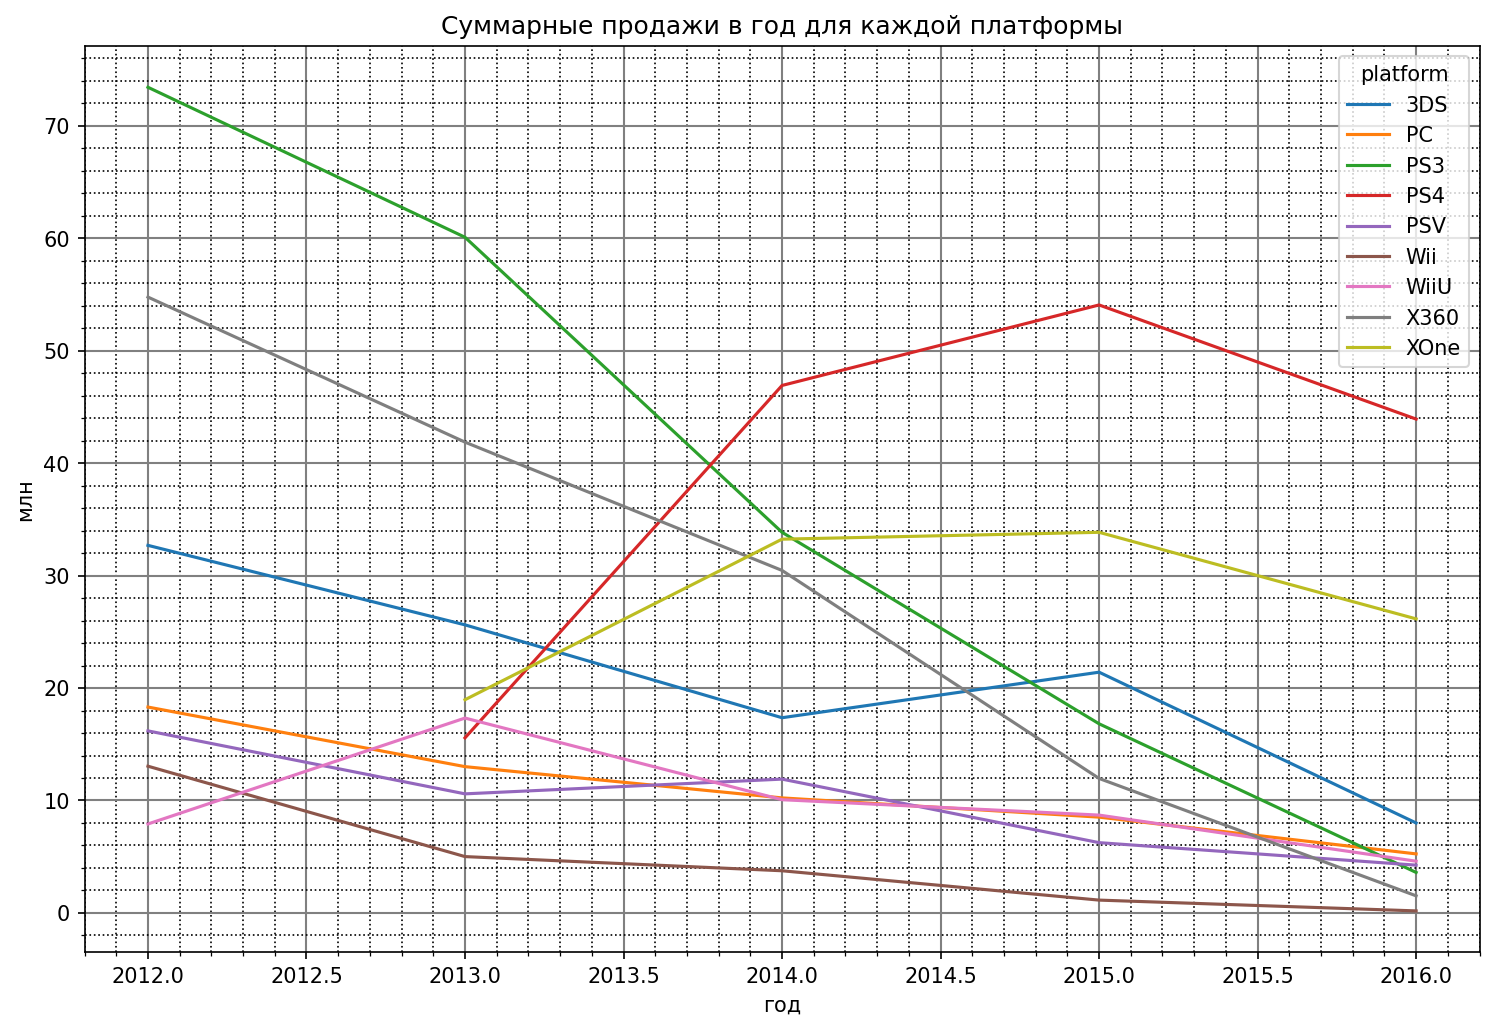

In [135]:
bar_pop = platform_actual.reset_index().pivot_table(index=['year_of_release'], columns = ['platform'], values='total_sales', aggfunc='sum')
bar_pop.plot(grid=True, figsize=(12,8))
plt.minorticks_on()
plt.grid(which='major',
        color = 'gray',
        linewidth = 1)
plt.grid(which='minor', 
        color = 'k', 
        linestyle = ':')
plt.ylabel ('млн')
plt.xlabel ('год')
plt.title ('Суммарные продажи в год для каждой платформы')
plt.show();

__Выводы:__
* Выпущенные в 2005–2006 гг. платформы, такие как Wii, X360, PS3, демонстрировали сильный рост в течении первых 2-3 лет продаж. После достижения пика заметно снижение суммарных продаж до 2016 г. Стоит обратить внимание на момент 2016 г. этим устройствам уже 10-11 лет, что выше среднего возраста (9,7 лет) существования платформ на рынке. В совокупности со снижением продаж и среднего возраста платформ, можно сказать, что в течении 1-2 лет продажи на них прекратятся.
* Выпущенные XOne и PS4 в 2013 г. не показали похожей динамики, что их предыдущие версии (X360, PS3), темп роста снизился в 2015 г., а в 2016 г. вовсе упал.
* Все актуальные платформы показывали рост на второй год наблюдений, платформы выпущенные после 2010 г. на 3 год показывали либо снижение темпов роста или отрицательный темп роста.
* Несмотря на снижение, потенциально прибыльными платформами являются PS4 и XOne по нескольким причинам: 
    * на 2016 г. возраст платформы равен 3 годам, что значительно ниже определенного среднего возраста существования платформ;
    * конкурирующие платформы были выпущены раньше, на 2016 г. имеют суммарные продажи игр меньше 10 млн и показывают снижение по сравнению с 2015 г.

<a id='section_3_4'></a>
### 3.4 График «ящик с усами» по глобальным продажам игр в разбивке по платформам

Построим ящик с усами для популярных платформ, где суммарные продажи выше 100 млн.

In [92]:
popular_platforms_new = new_data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
top_platforms = popular_platforms_new.loc[lambda x : x>100]
list_of_popular_platforms_new = top_platforms.keys()
#top_platforms_data = new_data.query('')
test_new = new_data.query('platform in @list_of_popular_platforms_new')
#test_new.head(10)
test_new['platform'].unique()

array(['PS4', 'XOne', 'X360', 'PS3', '3DS'], dtype=object)

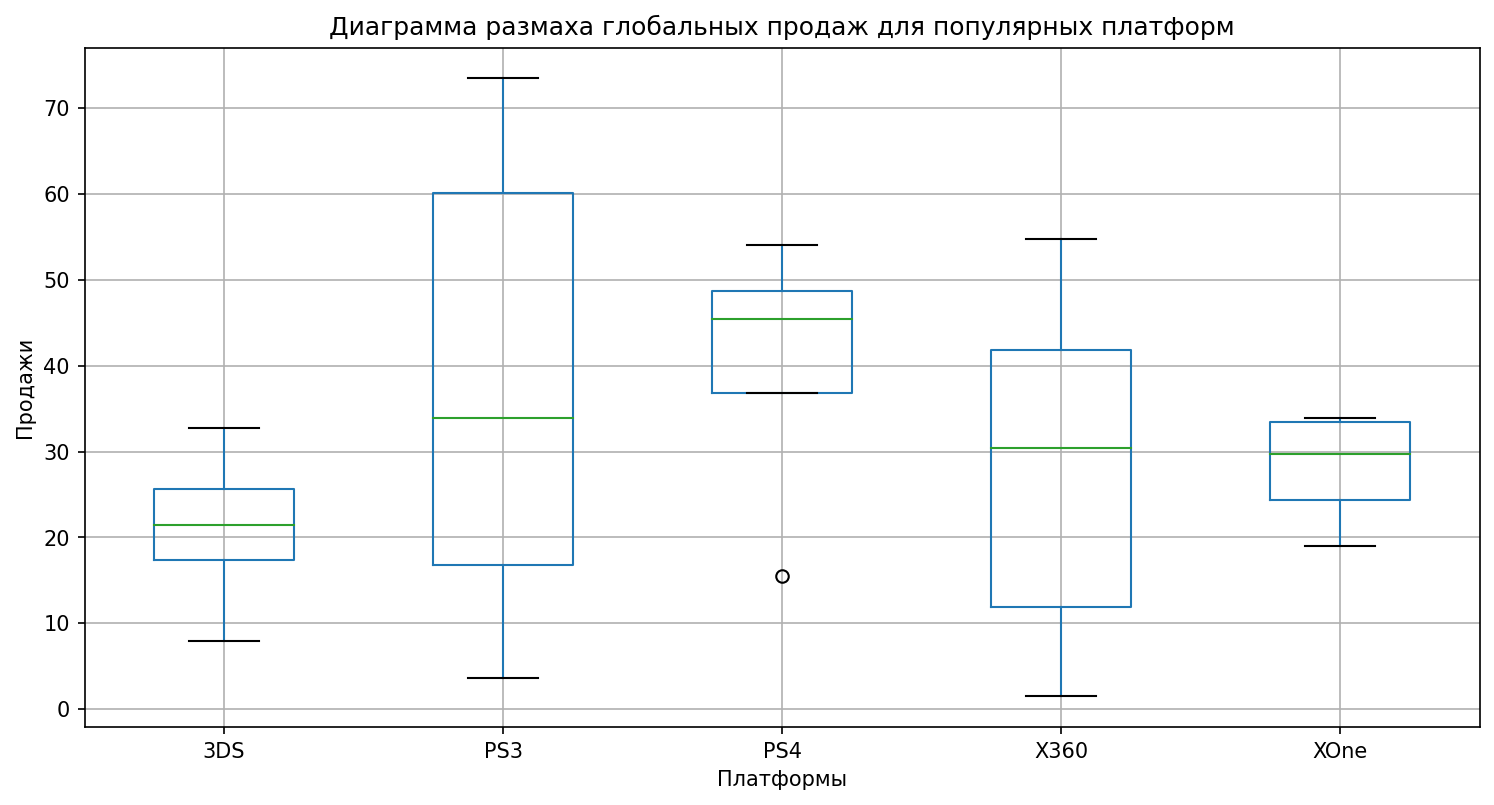

In [108]:

(test_new.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc=('sum'))
    .boxplot(figsize=(12,6)))

plt.title('Диаграмма размаха глобальных продаж для популярных платформ')
plt.ylabel('Продажи')
plt.xlabel('Платформы')
plt.show();

__Вывод:__
* 3DS - чаще всего встречаются значения от примерно 17 млн. до 25 млн в год, медиана равна 22 млн в год;
* PS3 - разброс больше, чем у PS4, который составил примерно 17-60 млн в год, медиана примерно 35 млн в год;
* PS4 - разброс невелик – 38-49 млн в год, медиана ближе к третьему квартилю и равна примерно 46 млн в год;
* X360 - сильный разброс от примерно 32 до 41 млн в год, медиана примерно равна 30 млн в год;
* XOne - слабый разброс от 25 до 35 млн в год, медиана 30 млн в год;
* Для потенциально прибыльных платформ характерен небольшой разброс, ввиду короткого времени нахождения этих платформ на рынке.

<a id='section_3_5'></a>
### 3.5 Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков?

Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Для анализа возьмем самую популярную платформу в 2016 г. – PS4. 

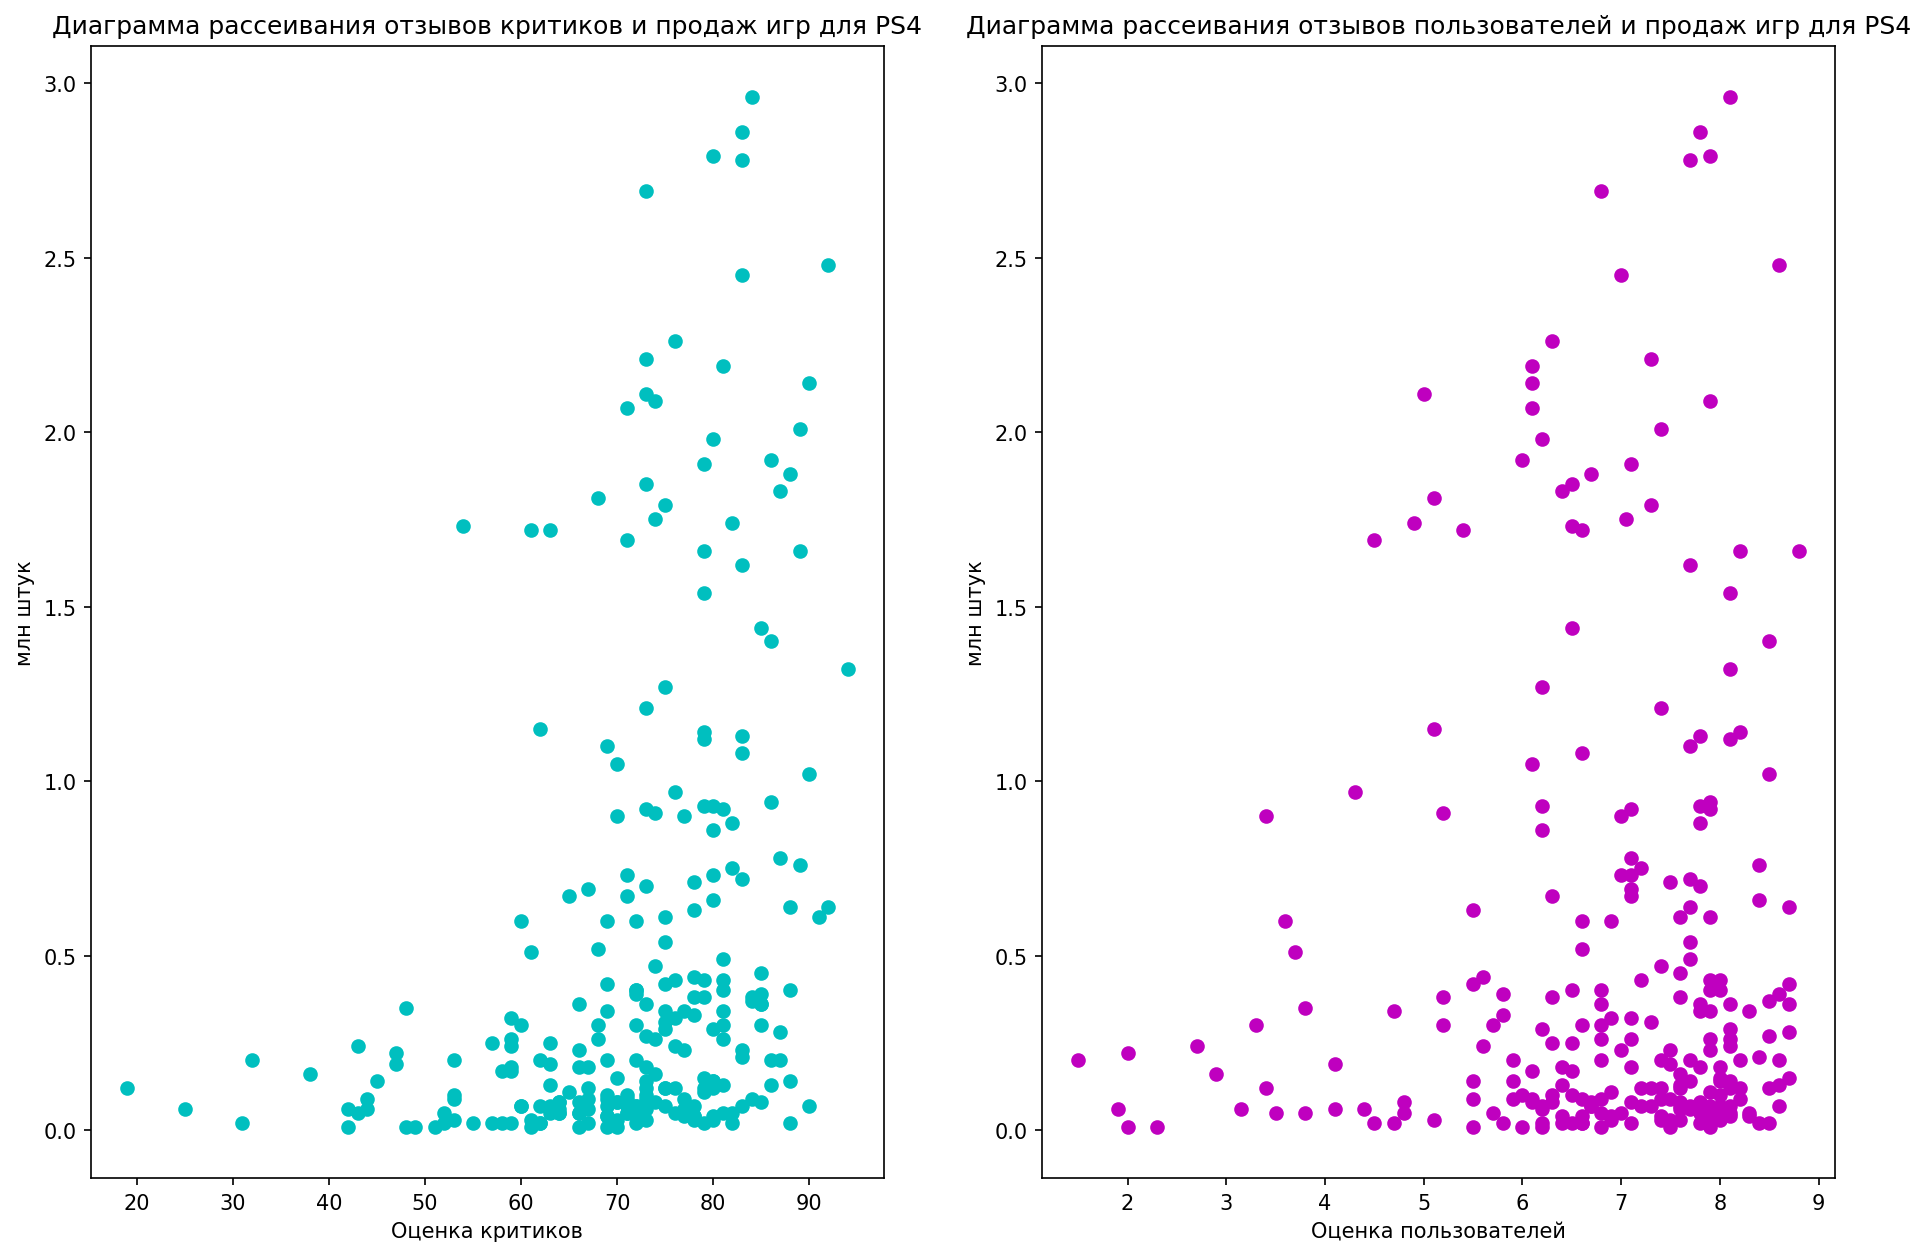

Коэффициент корреляции Пирсона для продаж игр и оценок критиков: 0.3442302293819189
Коэффициент корреляции Пирсона для продаж игр и оценок пользователей: 0.0548876050429485


In [119]:

def plot_corr (platforms, x, y1, y2, color1, color2, title1, title2, labelx1, labelx2, labely):
    df = new_data[new_data['platform']==platforms].copy().dropna()
    f, axs = plt.subplots(1, 1, figsize=(15, 10))
    plt.subplot(121)
    plt.scatter(df[y1], df[x], c=color1)
    plt.title (title1 + platforms)
    plt.ylabel(labely)
    plt.xlabel(labelx1)
    df[x] = df[x].astype('float64')
    df[y1] = df[y1].astype('float64')
    plt.subplot(122)
    plt.scatter(df[y2], df[x], c=color2)
    plt.title (title2 + platforms)
    plt.ylabel(labely)
    plt.xlabel(labelx2)
    plt.show()
    df[y2] = df[y2].astype('float64')
   
    print ('Коэффициент корреляции Пирсона для продаж игр и оценок критиков:', df[x].corr(df[y1]))
    print ('Коэффициент корреляции Пирсона для продаж игр и оценок пользователей:', df[x].corr(df[y2]))
    
plot_corr ('PS4', 'total_sales', 'critic_score', 'user_score', 'c', 'm', 
           'Диаграмма рассеивания отзывов критиков и продаж игр для ', 
           'Диаграмма рассеивания отзывов пользователей и продаж игр для ', 
           'Оценка критиков', 'Оценка пользователей', 'млн штук')

__Вывод для PS4:__
* в результате анализа диаграмм рассеивания оценок пользователей и продажами и оценок критиков и продажами не было обнаружено связи, но можно сказать, что игры, чьи продажи больше 2 млн имеют оценки критиков больше 70, а оценки пользователей не меньше 5.
* коэффициент корреляции расчитанный для объема продаж и оценки критиков показал слабую связь, для объема продаж и оценки пользователей – очень слабую связь;
* таким образом можно сказать, что оценка критиков незначительно больше влияет на суммарные продажи, чем оценка пользователей для PS4.

<a id='section_3_6'></a>
### 3.6 Продажи игр на других платформах

Рассмотрим топ-5 самых прибыльных платформ и одну потенциально прибыльную платформу.

__XOne__

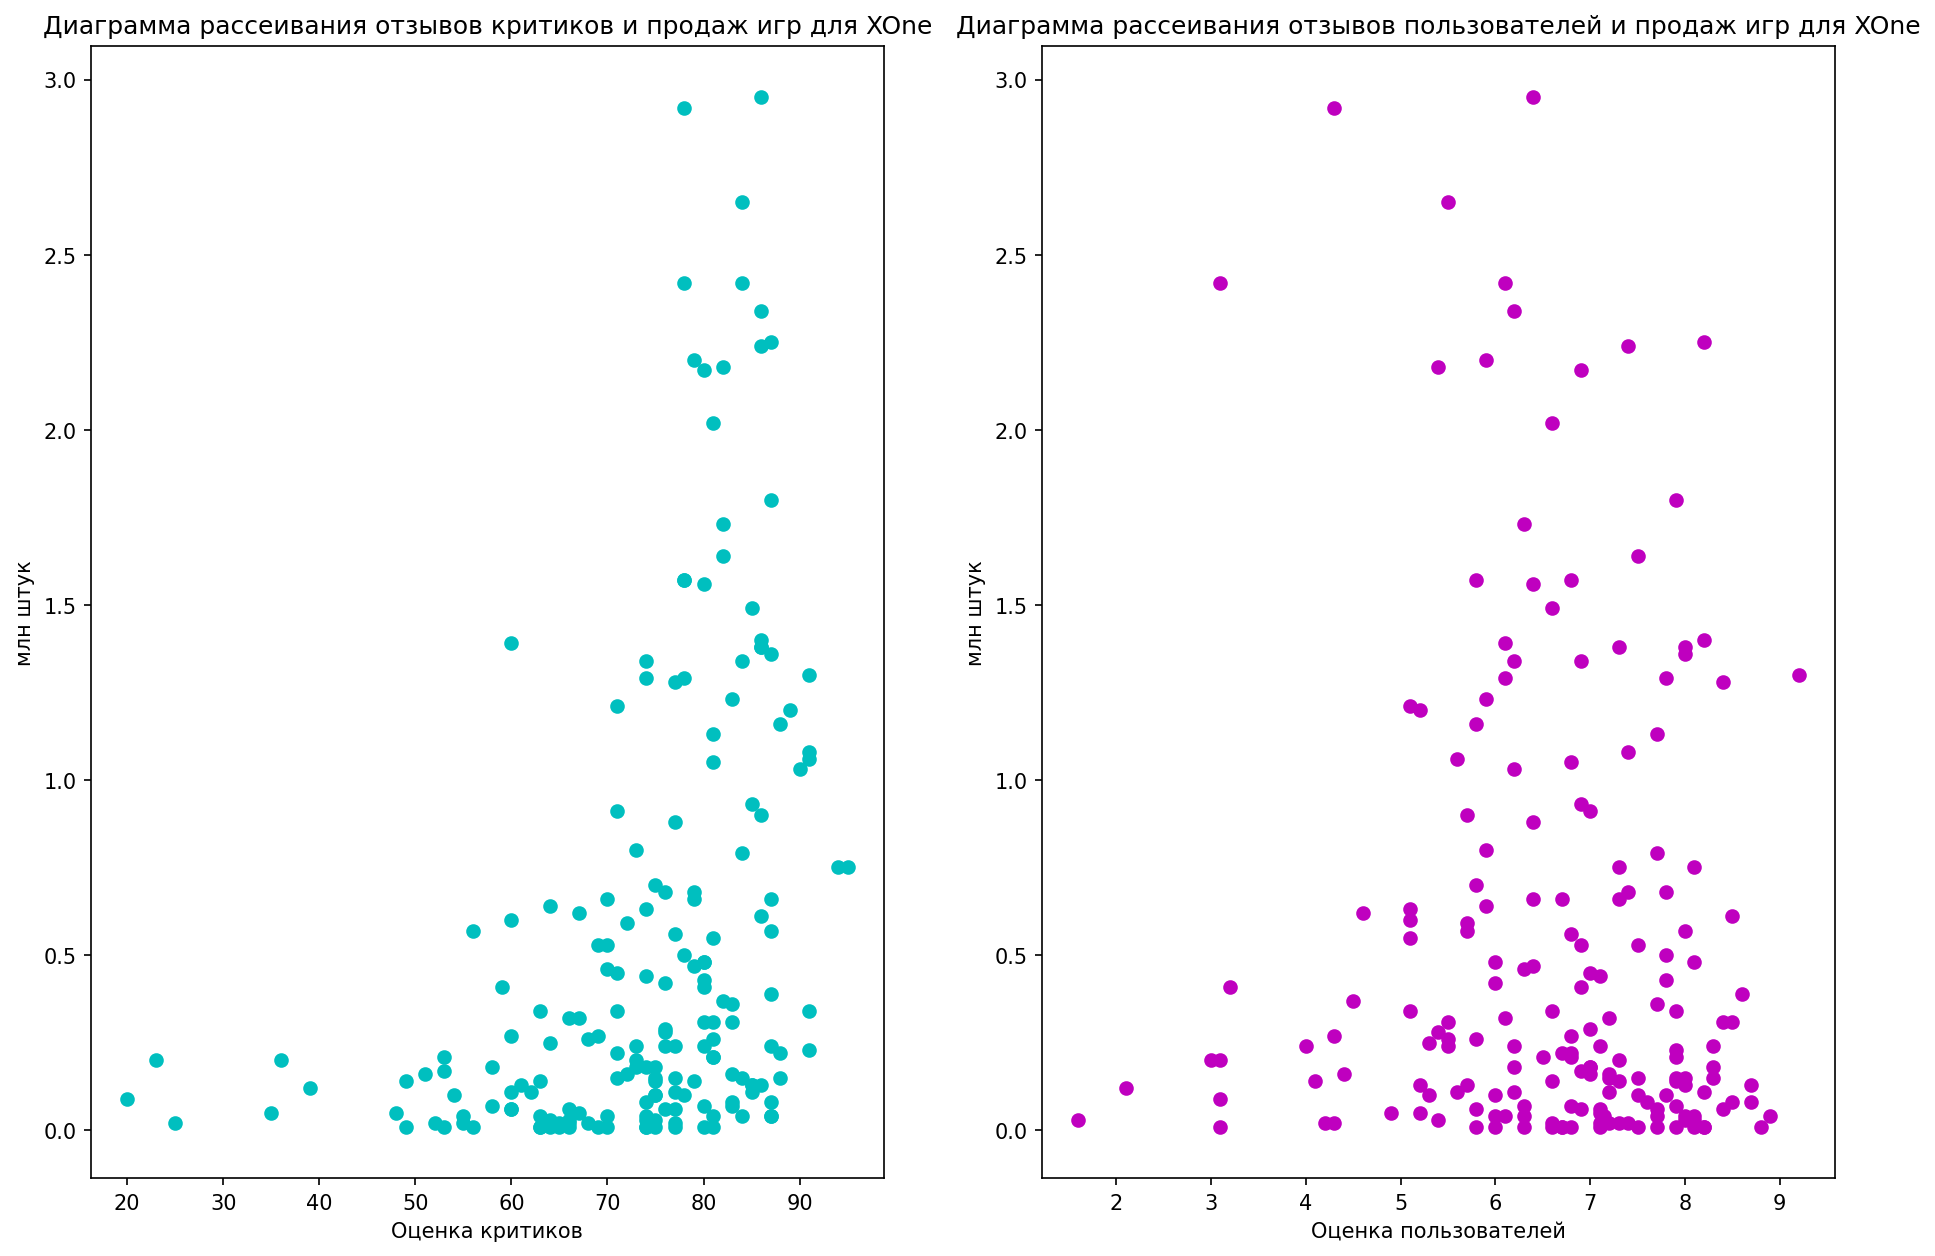

Коэффициент корреляции Пирсона для продаж игр и оценок критиков: 0.385250185810938
Коэффициент корреляции Пирсона для продаж игр и оценок пользователей: -0.06601932878363424


In [120]:
plot_corr ('XOne', 'total_sales', 'critic_score', 'user_score', 'c', 'm', 'Диаграмма рассеивания отзывов критиков и продаж игр для ', 'Диаграмма рассеивания отзывов пользователей и продаж игр для ', 'Оценка критиков', 'Оценка пользователей', 'млн штук')

__PS3__

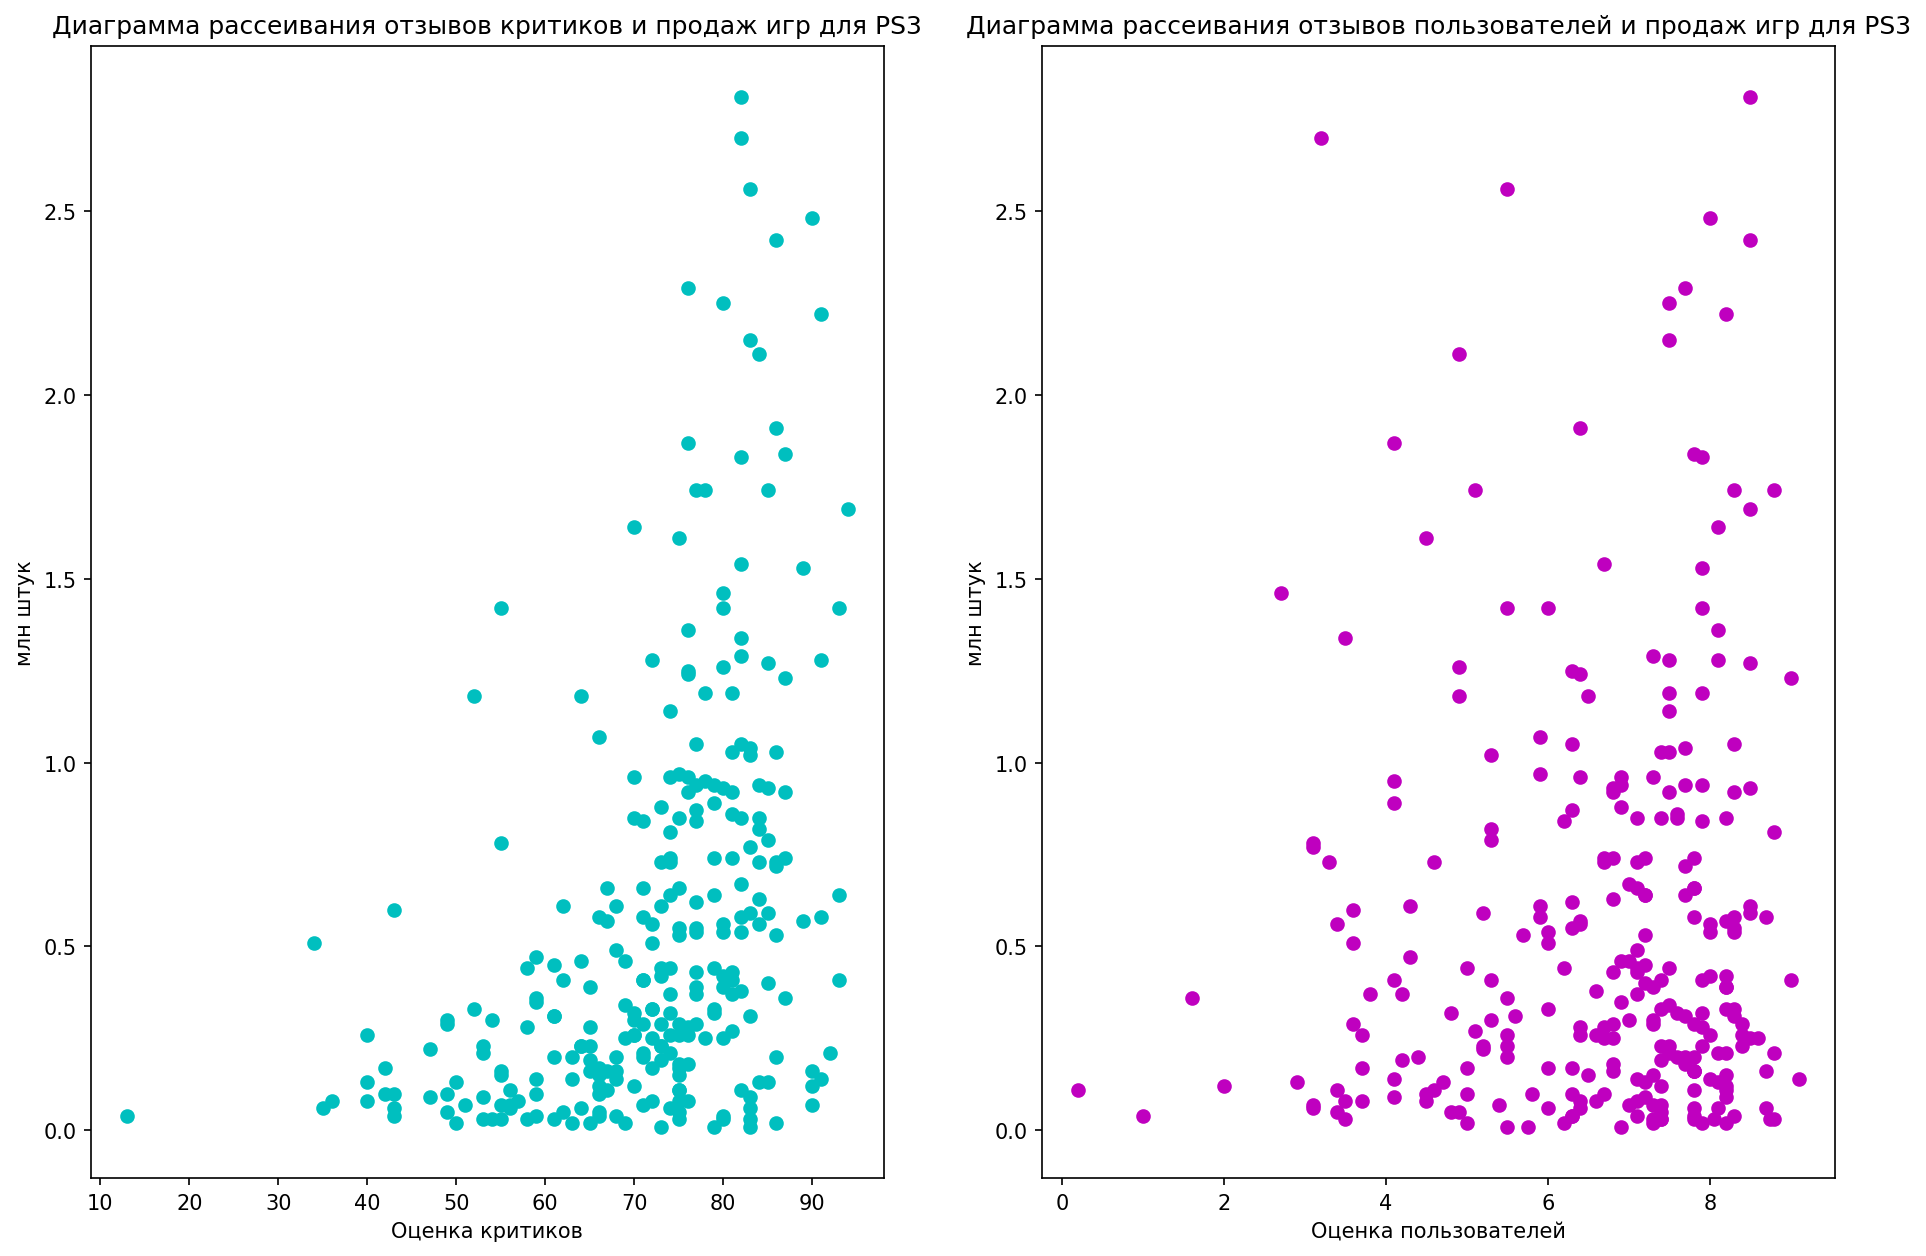

Коэффициент корреляции Пирсона для продаж игр и оценок критиков: 0.4266612780875371
Коэффициент корреляции Пирсона для продаж игр и оценок пользователей: 0.08372166986157005


In [121]:
plot_corr ('PS3', 'total_sales', 'critic_score', 'user_score', 'c', 'm', 'Диаграмма рассеивания отзывов критиков и продаж игр для ', 'Диаграмма рассеивания отзывов пользователей и продаж игр для ', 'Оценка критиков', 'Оценка пользователей', 'млн штук')

__X360__

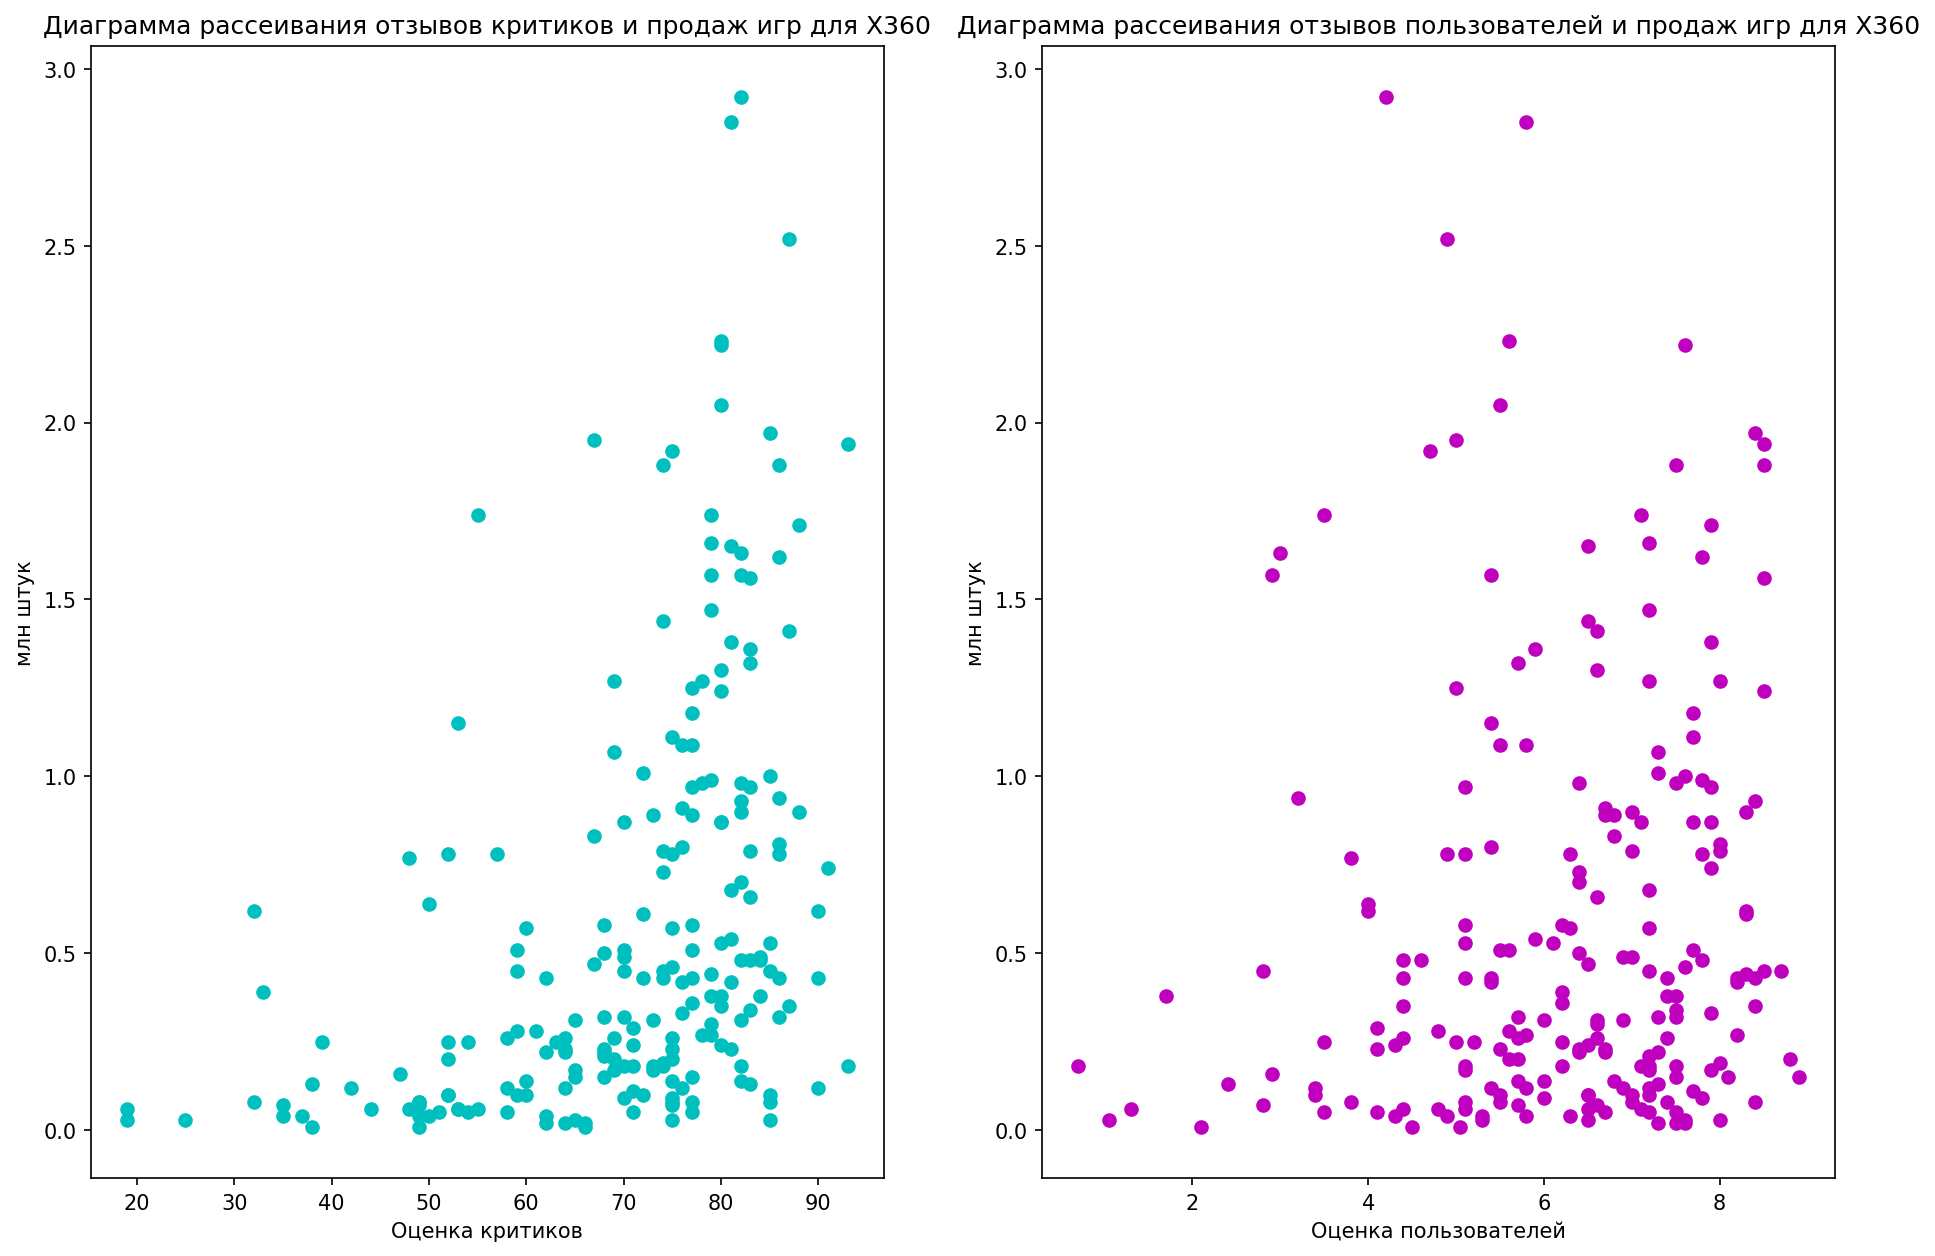

Коэффициент корреляции Пирсона для продаж игр и оценок критиков: 0.41787069988483483
Коэффициент корреляции Пирсона для продаж игр и оценок пользователей: 0.10465680788675612


In [122]:
plot_corr ('X360', 'total_sales', 'critic_score', 'user_score', 'c', 'm', 'Диаграмма рассеивания отзывов критиков и продаж игр для ', 'Диаграмма рассеивания отзывов пользователей и продаж игр для ', 'Оценка критиков', 'Оценка пользователей', 'млн штук')

__3DS__

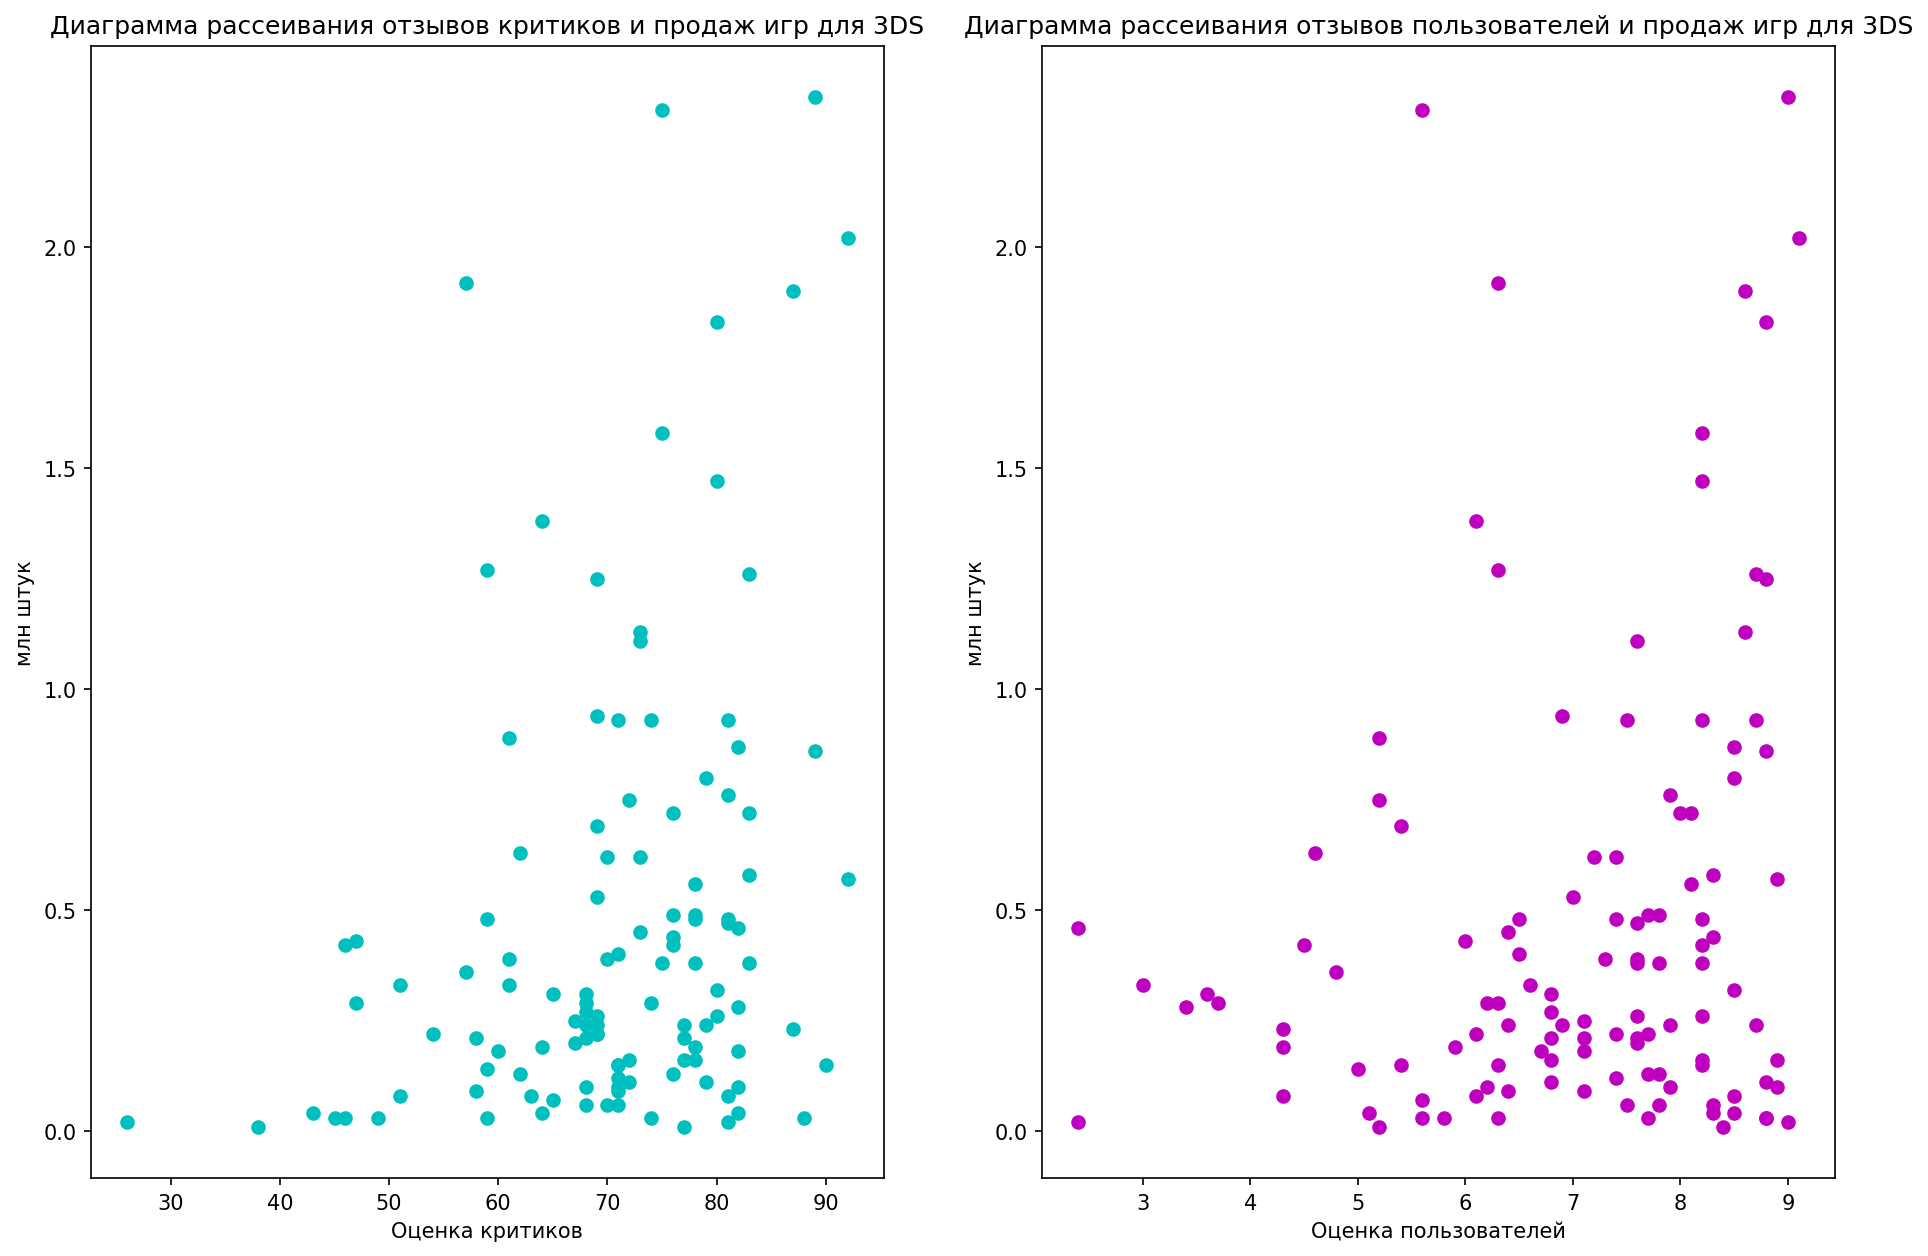

Коэффициент корреляции Пирсона для продаж игр и оценок критиков: 0.28916533660460014
Коэффициент корреляции Пирсона для продаж игр и оценок пользователей: 0.2033313118979848


In [123]:
plot_corr ('3DS', 'total_sales', 'critic_score', 'user_score', 'c', 'm', 'Диаграмма рассеивания отзывов критиков и продаж игр для ', 'Диаграмма рассеивания отзывов пользователей и продаж игр для ', 'Оценка критиков', 'Оценка пользователей', 'млн штук')

__Выводы:__

* анализ диаграмм рассеивания по обоим параметрам для других топ-5 платформ по суммарным продажам показал схожую картину, как и для PS4, то есть не было обнаружено связи между оценками пользователей и продажами, оценоками критиков и продажами;
* коэффициент корреляции расчитанный для объема продаж и оценки критиков рассмотренных платформ показал умеренную связь показателей;
* наибольший коэффициент корреляции расчитанный для объема продаж и оценок пользователей наблюдался для 3DS, хотя эту связь можно охарактеризовать как слабую, для других платформ набюдалась очень слабая связь этих показателей, за исключением XOne, где коэф. корреляции показал обратную очень слабую связь;
* в основном можно сказать, что игры с высокими суммарными продажами имеют относительно высокую оценку критиков и пользователей. 

<a id='section_3_7'></a>
### 3.7 Общее распределение игр по жанрам

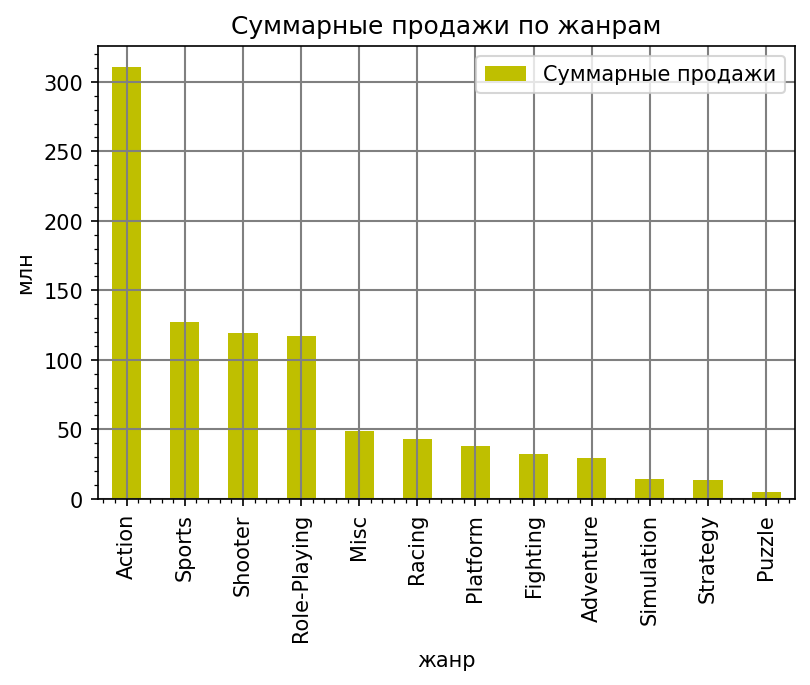

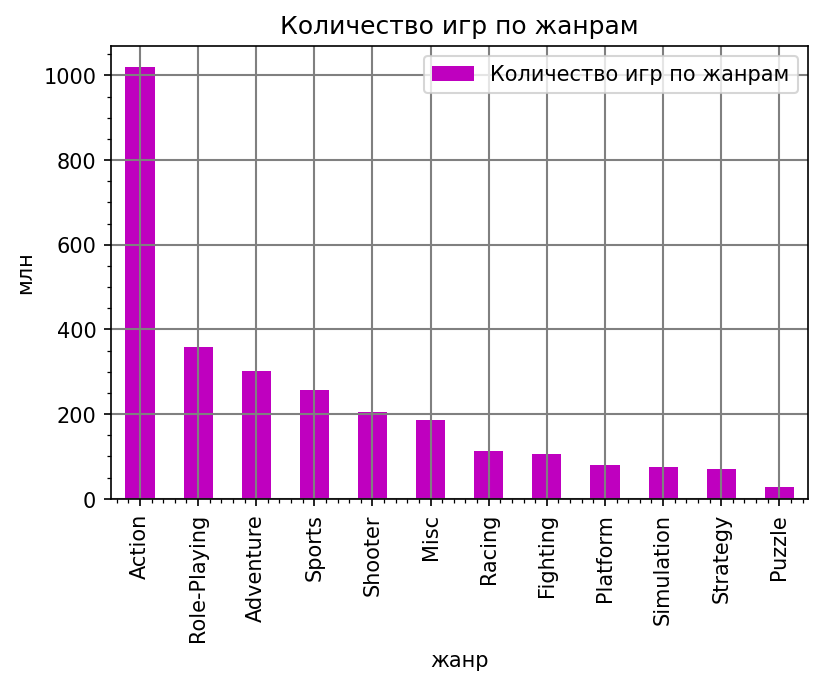

In [126]:
genre_sales = (new_data
              .pivot_table(index='genre', values='total_sales', aggfunc={'sum'})
              .sort_values(by='sum', ascending=False))
genre_sales_count = (new_data
              .pivot_table(index='genre', values='total_sales', aggfunc={'count'})
              .sort_values(by='count', ascending=False))

genre_sales.plot(kind='bar', color='y')
plt.minorticks_on()
plt.grid(which='major',
        color = 'gray',
        linewidth = 1)

plt.title ('Суммарные продажи по жанрам')
plt.ylabel ('млн')
plt.xlabel ('жанр')
plt.legend (['Суммарные продажи'])
plt.show()
genre_sales_count.plot(kind='bar', color='m')
plt.minorticks_on()
plt.grid(which='major',
        color = 'gray',
        linewidth = 1)

plt.title ('Количество игр по жанрам')
plt.ylabel ('млн')
plt.xlabel ('жанр')
plt.legend (['Количество игр по жанрам'])
plt.show()

__Вывод:__
* самыми попуярными жанрами по суммарным продажам являются: action, sports, shooter, role-playing и misc;
* самыми непопуярными жанрами по суммарным продажам являются: puzzle, strategy и simulation;
* самыми высокими продажами отмечается жанр action, низкими – puzzle;
* лидерство жанра action можно объяснить наибольшим количеством игр такого жанра, непопулярность puzzle и strategy – наименьшим количеством игр соответствующих жанров;
* несмотря на нахождение жанра adventure в топ-3 по количеству игр, продажи игр этого жанра являются одними из худших. 

## Часть 4. Составление портрета пользователя каждого региона

<a id='section_4_1'></a>
### 4.1 Самые популярные платформы (топ-5) для пользователя каждого региона (NA, EU, JP)

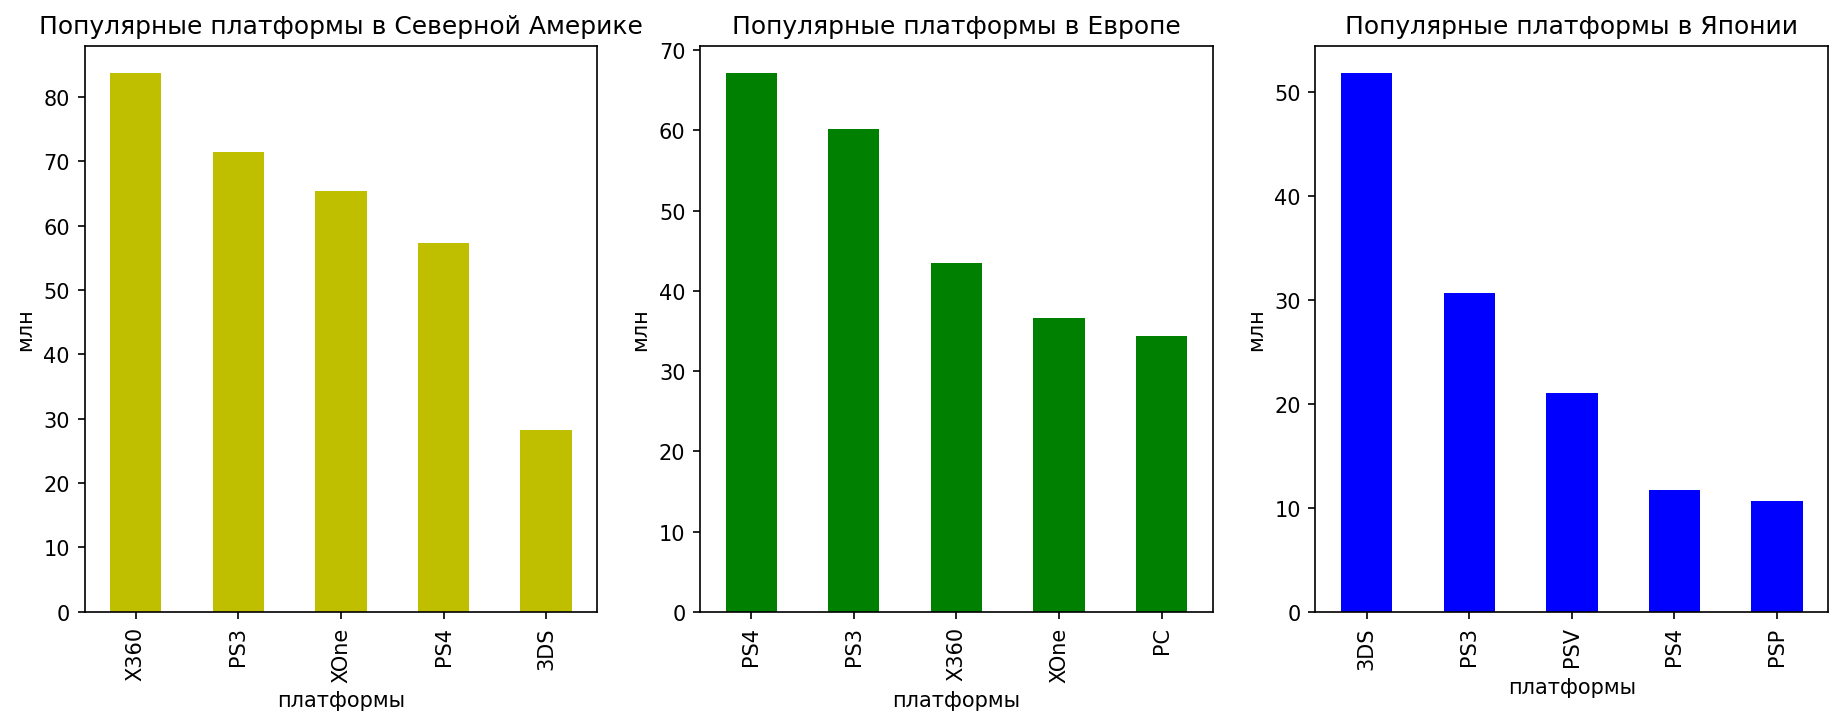

In [128]:
def top_by_region (data, column, title, head_num):
    regions = ['na_sales', 'eu_sales', 'jp_sales']
    titles = ['Северной Америке', 'Европе', 'Японии']
    color = ['y','g','b']
    index = 1
    f, axs = plt.subplots(1, 3, figsize=(15, 5))
    for region, i, color in zip(regions, titles, color):
        df = data.groupby(column)[region].sum().sort_values(ascending=False).head(head_num)
        plt.subplot(1, 3, index)
        index += 1 
        df.plot.bar(color=color)
        plt.title ('Популярные ' + title + ' в ' + i)
        plt.ylabel('млн')
        plt.xlabel(title)
    
top_by_region (new_data, 'platform', 'платформы', 5)


__Выводы:__
* в каждом регионе свои платформы-лидеры: в Северной Америке – X360, в Европе – PS4, в Японии – 3DS;
* такие платформы как PS3 и PS4 входят в топ-5 всех рассмотренных регионов;
* платформа PC входит в топ-5 только в Европе, PSP – только в Японии;
* все из топ-5 платформ Северной Америки встречаются в других регионах, то есть в топ-5 нет уникальной для этого региона платформы.

<a id='section_4_2'></a>
### 4.2 Самые популярные жанры (топ-5)

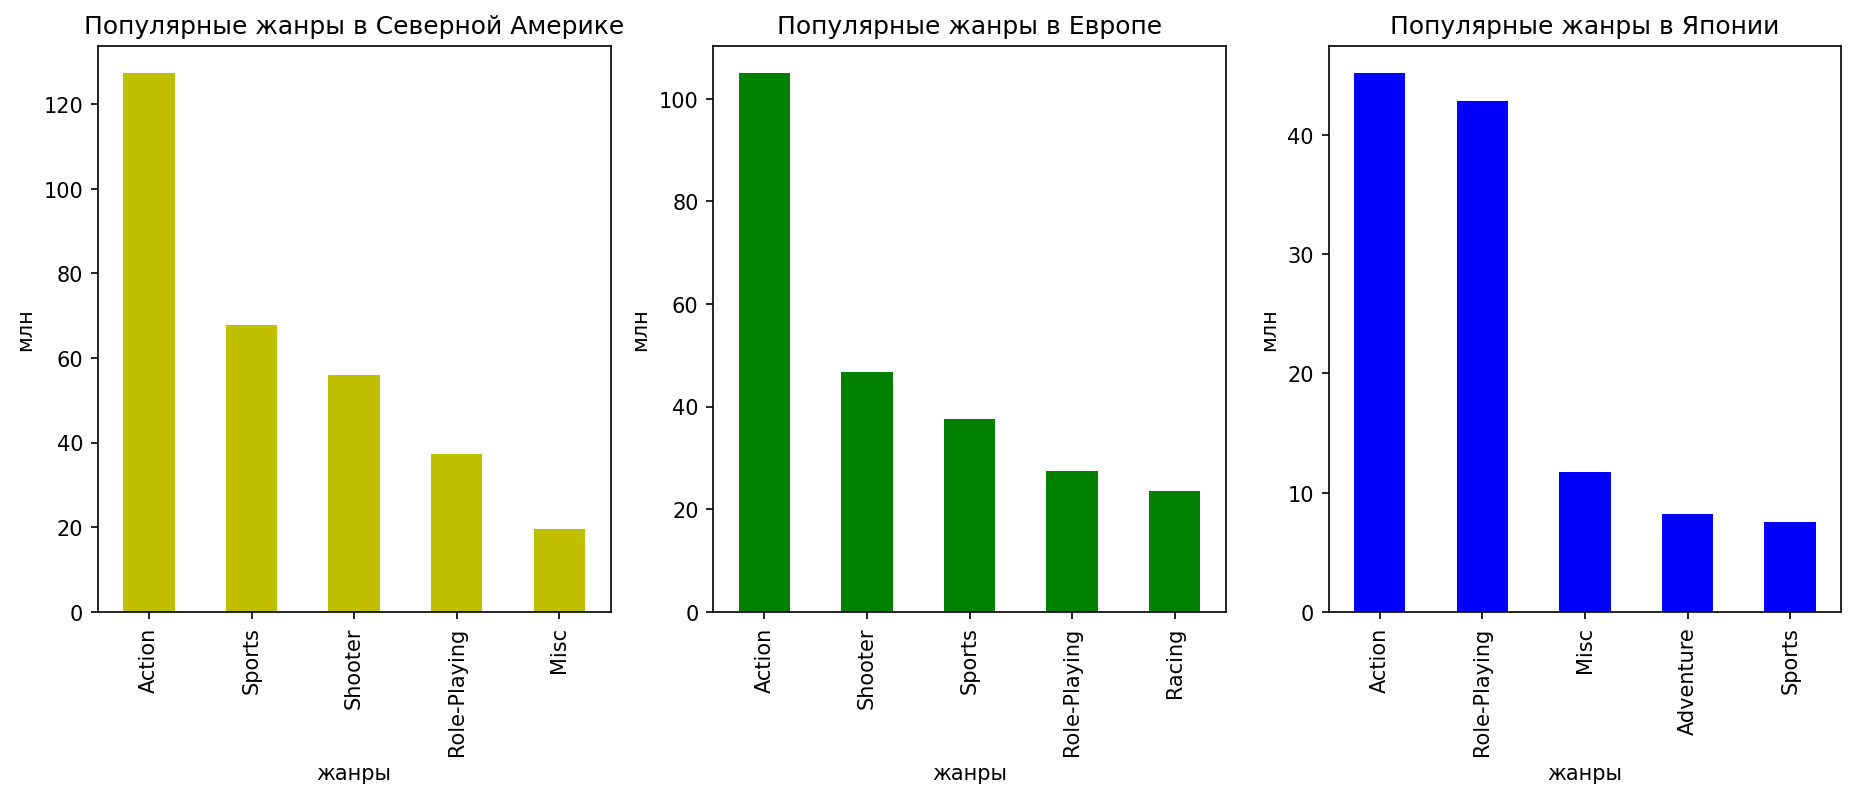

In [129]:
top_by_region (new_data, 'genre', 'жанры', 5)

__Выводы:__
* для всех регионов action является самым популярным жанром;
* первая четверка жанров по популярности в Северной Америке и Европе идентична, но с другим распределением;
* жанры action и role-playing sports входят в топ-5 всех рассмотренных регионов;
* жанр racing входит в топ-5 только в Европе, adventure – только в Японии;
* все из топ-5 жанров Северной Америки встречаются в других регионах, то есть в топ-5 нет уникального для этого региона жанра.
* японский рынок имеет отличительные от остальных характеристики, так как в этой стране популярны портативные консоли, а для таких платформ характерны определенные жанры.

<a id='section_4_3'></a>
### 4.3 Влияет ли рейтинг ESRB на продажи в отдельном регионе?

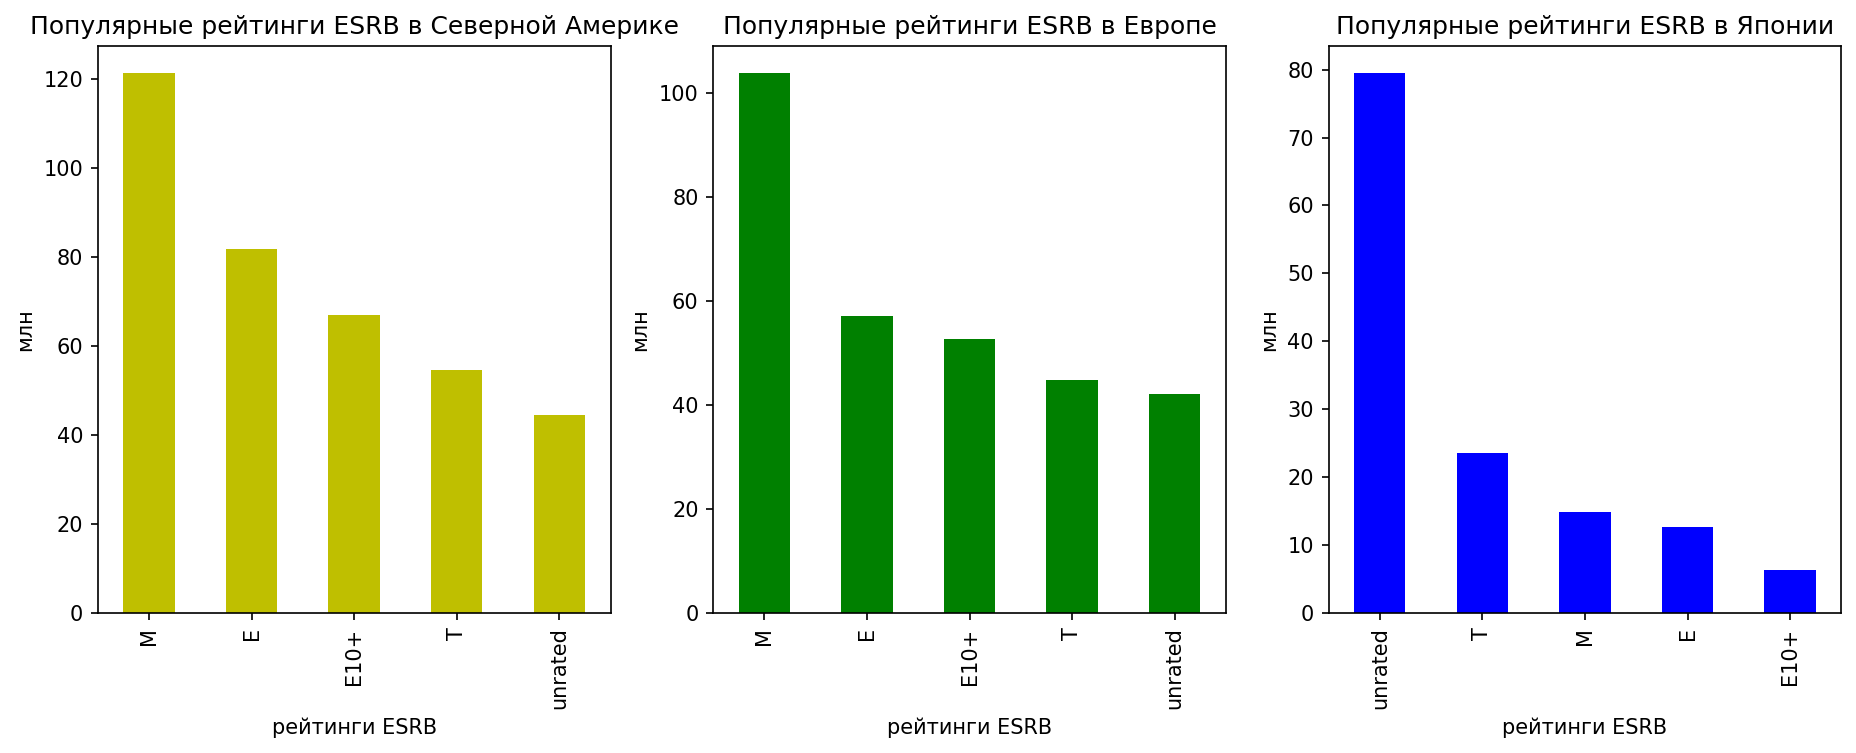

In [130]:
top_by_region (new_data, 'rating', 'рейтинги ESRB', 5)

__Выводы:__
* игры с рейтингами E, T, M, E10+ имеют высокие объемы продаж в Европе и Северной Америке, причем распределение этих рейтингов в Северной Америке и Европе идентично;
* Игры без рейтинга продаются хуже в Северной Америке и Европе, но в Японии – наоборот, игры без рейтинга ESRB имеют самые высокие объемы продаж, опережая самую поплуярную игру с рейтингом ESRB почти в 4 раза;
* распределение этих рейтингов в Японии отличается, тем что игры рейтинга T имели больше продаж, чем игры рейтинга Е, которые более популярны в Северной Америке и Европе;
* в целом можно констатировать, что рейтинг ESRB имеет влияние на продажи в Европе и Северной Америке, в то время как влияние этого рейтинга на продажи игр в Японии совсем незначительно;
* слабое влияние рейтинга ESRB на продажи в Японии можно объяснить тем, что в этой стране действует другой рейтинг – CERO.

## Часть 5. Проверка гипотез

<a id='section_5_1'></a>
### 5.1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Сформулируем нулевую гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Таким образом альтернативная гипотеза будет утверждать обратное, что средние пользовательские рейтинги платформ Xbox One и PC различаются.

In [131]:
pc = new_data.query("platform == 'PC'")
xone = new_data.query("platform == 'XOne'")
print ('Средний пользовательский рейтинг платформ PC {:.2f}'.format(pc['user_score'].mean()))
print ('Средний пользовательский рейтинг платформ XOne {:.2f}'.format(xone['user_score'].mean()))
variance_pc = np.var(pc['user_score'], ddof=1)
variance_xone = np.var(xone['user_score'], ddof=1)
print ('Дисперсия пользовательских рейтингов PS4 {}'.format(variance_pc))
print ('Дисперсия пользовательских рейтингов XOne {}'.format(variance_xone))

Средний пользовательский рейтинг платформ PC 6.47
Средний пользовательский рейтинг платформ XOne 6.62
Дисперсия пользовательских рейтингов PS4 2.7372765523961338
Дисперсия пользовательских рейтингов XOne 1.9111298384851


In [132]:
alpha = .05

results = st.ttest_ind(pc['user_score'], xone['user_score'], equal_var=False, nan_policy ='omit')

print('p-значение: ', results.pvalue)

if (results.pvalue < alpha): 
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.3467689771672038
Не получилось отвергнуть нулевую гипотезу


__Выводы:__
* Нулевая гипотеза о равенстве средних пользовательских рейтингов платформ Xbox One и PC не была отвергнута, то есть средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

<a id='section_5_2'></a>
### 5.2 Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Сформулируем нулевую гипотезу: средние пользовательские рейтинги жанров Action и Sports равны.
Альтернативная гипотеза – средние пользовательские рейтинги жанров Action и Sports отличаются.

In [133]:
action = new_data.query("genre == 'Action'")
sports = new_data.query("genre == 'Sports'")
print ('Средний пользовательский рейтинг жанра Action {:.2f}'.format(action['user_score'].mean()))
print ('Средний пользовательский рейтинг жанра Sports {:.2f}'.format(sports['user_score'].mean()))
variance_action = np.var(action['user_score'], ddof=1)
variance_sports = np.var(sports['user_score'], ddof=1)
print ('Дисперсия пользовательских рейтингов жанра Action {}'.format(variance_action))
print ('Дисперсия пользовательских рейтингов жанра Sports {}'.format(variance_sports))

Средний пользовательский рейтинг жанра Action 6.85
Средний пользовательский рейтинг жанра Sports 5.45
Дисперсия пользовательских рейтингов жанра Action 1.924985752840018
Дисперсия пользовательских рейтингов жанра Sports 3.1486321307809773


In [134]:
alpha = .05

results = st.ttest_ind(action['user_score'], sports['user_score'], equal_var=False, nan_policy ='omit')

print('p-значение: ', results.pvalue)

if (results.pvalue < alpha): 
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  5.471060962820179e-20
Отвергаем нулевую гипотезу


__Выводы:__
* Нулевую гипотезу о равенстве средних пользовательских рейтингов жанров Action и Sports получилось отвергнуть, что говорит о том, что в зависимости от жанра отзывы пользователей могут отличаться.

<a id='section_6_1'></a>
## Часть 6. Результаты исследования

* Изучив частоту релиза игр за весь период наблюдений можно сделать вывод, что необходимым для исследования периодом является 2004-2016 гг.;
* В среднем платформы существуют 9,7 лет, за исключением PC, который актуален по сей день;
* Можно выделить топ-5 платформ по суммарным продажам в актуальный период: PS3, PS4, X360, XOne, 3DS. Суммарные продажи каждой из платформ были выше 100 млн.;
* Потенциально прибыльными платформами являются PS4 и XOne по нескольким причинам: 
    * на 2016 г. возраст платформы равен 3 годам, что значительно ниже определенного среднего возраста существования платформ;
    * конкурирующие платформы были выпущены раньше, на 2016 г. имеют суммарные продажи игр меньше 10 млн и показывают снижение по сравнению с 2015 г.
* Оценка критиков незначительно больше влияет на суммарные продажи, чем оценка пользователей для PS4;
* Игры с высокими суммарными продажами имеют относительно высокую оценку критиков и пользователей;
* Коэффициент корреляции расчитанный для объема продаж и оценки критиков рассмотренных платформ показал умеренную связь показателей;
* Самыми попуярными жанрами по суммарным продажам являются: action, sports, shooter, role-playing и misc;
* Самыми непопуярными жанрами по суммарным продажам являются: puzzle, strategy и simulation;
* Самыми высокими продажами отмечается жанр action, низкими – puzzle;
* В каждом регионе свои платформы-лидеры: в Северной Америке – X360, в Европе – PS4, в Японии – 3DS;
* Такие платформы как PS3 и PS4 входят в топ-5 всех рассмотренных регионов;
* Платформа PC входит в топ-5 только в Европе, PSP – только в Японии;
* Все из топ-5 платформ Северной Америки встречаются в других регионах, то есть в топ-5 нет уникальной для этого региона платформы;
* Для всех регионов action является самым популярным жанром;
* Первая четверка жанров по популярности в Северной Америке и Европе идентична, но с другим распределением;
* Жанры action и role-playing sports входят в топ-5 всех рассмотренных регионов;
* Жанр racing входит в топ-5 только в Европе, adventure – только в Японии;
* Все из топ-5 жанров Северной Америки встречаются в других регионах, то есть в топ-5 нет уникального для этого региона жанра.
* Японский рынок имеет отличительные от остальных характеристики, так как в этой стране популярны портативные консоли, а для таких платформ характерны определенные жанры;
* Рейтинг ESRB имеет влияние на продажи в Европе и Северной Америке, в то время как влияние этого рейтинга на продажи игр в Японии совсем незначительно;
* Слабое влияние рейтинга ESRB на продажи в Японии можно объяснить тем, что в этой стране действует другой рейтинг – CERO;
* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* В зависимости от жанра отзывы пользователей могут отличаться.